In [1]:
import baccoemu
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import scipy
import warnings

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import plot_utils
import plotter
import utils
import run_inference as rinf
import moment_network as mn

%load_ext autoreload
%autoreload 2

2024-10-24 01:25:51.690122: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-24 01:25:51.931388: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 01:25:51.931434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 01:25:51.955327: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 01:25:52.033665: I tensorflow/core/platform/cpu_feature_guar

In [2]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

font, rcnew = plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
mpl.pyplot.rcParams.update(rcnew)
mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

### Results

In [7]:
plot_dir = '../plots/plots_2024-10-09'
save_plots = False

data_mode = 'emuPk'
if data_mode == 'emuPk':
    n_rlzs_per_cosmo = 1
    tag_emuPk = '_2param'
    tag_errG = f'_boxsize500'
    # if n_rlzs_per_cosmo==1:
    #     tag_datagen = f'{tag_emuPk}{tag_errG}'
    # else:
    tag_datagen = f'{tag_emuPk}{tag_errG}_nrlzs{n_rlzs_per_cosmo}'
    tag_data = '_'+data_mode + tag_datagen
elif data_mode == 'muchisimocksPk':
    tag_mocks = '_p5_n10000'
    tag_pk = '_b1000'
    tag_datagen = f'{tag_mocks}{tag_pk}'
    tag_data = '_'+data_mode + tag_datagen
print(tag_data)


_emuPk_2param_boxsize500_nrlzs1


In [8]:
frac_train=0.8
frac_val=0.1
frac_test=0.1

In [9]:
if data_mode == 'emuPk':
    theta, y, y_err, k, param_names, bias_params, random_ints = rinf.load_data_emuPk(tag_emuPk, tag_errG, tag_datagen)
elif data_mode == 'muchisimocksPk':
    theta, y, y_err, k, param_names, bias_params, random_ints = rinf.load_data_muchisimocksPk(tag_mocks, tag_pk)

theta_noiseless (10000,)


In [20]:
idxs_train, idxs_val, idxs_test = utils.idxs_train_val_test(random_ints, 
                                frac_train=frac_train, frac_val=frac_val, frac_test=frac_test)

# idxs_train = idxs_train[:n_train]
# idxs_val = idxs_val[:n_val]
# idxs_test = idxs_test[:n_test]

theta_train, theta_val, theta_test = utils.split_train_val_test(theta, idxs_train, idxs_val, idxs_test)
y_train, y_val, y_test = utils.split_train_val_test(y, idxs_train, idxs_val, idxs_test)
y_err_train, y_err_val, y_err_test = utils.split_train_val_test(y_err, idxs_train, idxs_val, idxs_test)

0.8 0.1 0.1


In [21]:
param_labels = [utils.param_label_dict[param_name] for param_name in param_names]

In [8]:
# only need for bounds, TODO save bounds somwehere
dir_emus_lbias = '/home/kstoreyf/external'
emu, emu_bounds, emu_param_names = utils.load_emu(dir_emus_lbias=dir_emus_lbias)
dict_bounds = {name: emu_bounds[emu_param_names.index(name)] for name in param_names}

Loading l-bias lpt emulator...


/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using ver

Nonlinear l-bias emulator loaded in memory.


/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Results for specific model

In [22]:
n_train = 8000
#tag_inf = f'{tag_data}_ntrain{n_train}_diagcov'
#tag_inf = f'{tag_data}_ntrain{n_train}'
tag_inf = f'{tag_data}_ntrain{n_train}'
#tag_inf = f'{tag_data}_ntrain{n_train}_diagcov_scalecovlog'
#tag_inf = f'{tag_data}_ntrain{n_train}_diagcov_scalecovminmax'
dir_mn = f'../results/results_moment_network/mn{tag_inf}'

In [23]:
theta_test_pred = np.load(f'{dir_mn}/theta_test_pred.npy')
covs_test_pred = np.load(f'{dir_mn}/covs_test_pred.npy')
print(theta_test_pred.shape, covs_test_pred.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../results/results_moment_network/mn_emuPk_2param_boxsize500_nrlzs1_ntrain8500/theta_test_pred.npy'

In [17]:
covs_test = np.load(f'{dir_mn}/covs_test.npy')
print(covs_test.shape)

(1000, 2, 2)


In [18]:
print(covs_test_pred[0])
print(covs_test[0])

[[4.62999371e-05 0.00000000e+00]
 [0.00000000e+00 9.45094429e-07]]
[[1.36062074e-04 0.00000000e+00]
 [0.00000000e+00 5.38419038e-06]]


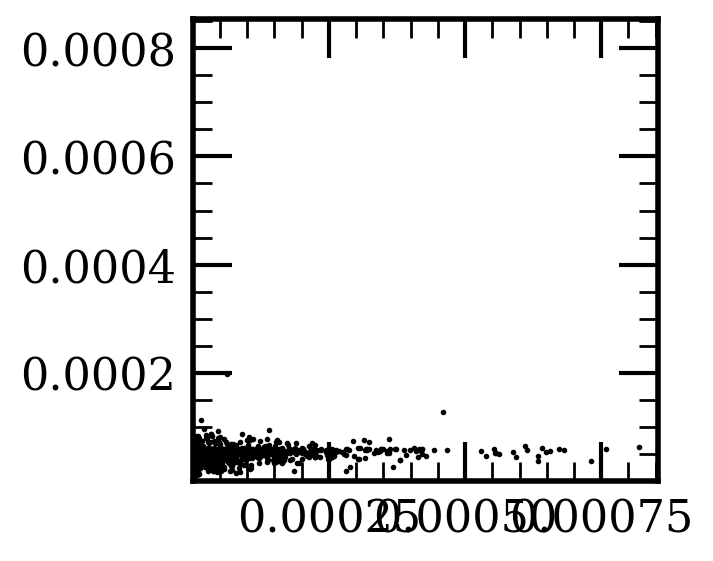

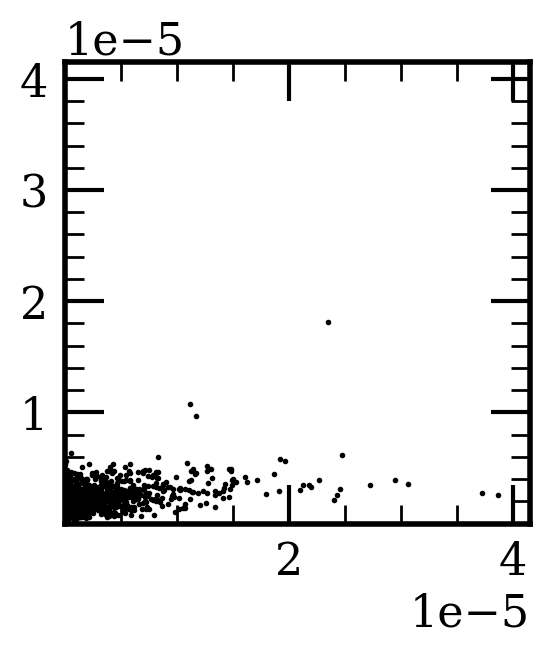

In [19]:
for i in range(covs_test.shape[1]):
    for j in range(covs_test.shape[2]):
        if i!=j:
            continue
        plt.figure(figsize=(3,3))
        plt.scatter(covs_test[:,i,j], covs_test_pred[:,i,j], color='k', s=1)
        plt.xlim(min(np.min(covs_test[:,i,j]), np.min(covs_test_pred[:,i,j])),
                max(np.max(covs_test[:,i,j]), np.max(covs_test_pred[:,i,j])))
        plt.ylim(min(np.min(covs_test[:,i,j]), np.min(covs_test_pred[:,i,j])),
                max(np.max(covs_test[:,i,j]), np.max(covs_test_pred[:,i,j])))



In [20]:
# moment_network = mn.MomentNetwork(tag_mn=tag_inf)
# moment_network.load_model_mean()
history_mean = np.load(f'{dir_mn}/model_mean_history.npy', allow_pickle=True).item()
history_cov = np.load(f'{dir_mn}/model_cov_history.npy', allow_pickle=True).item()

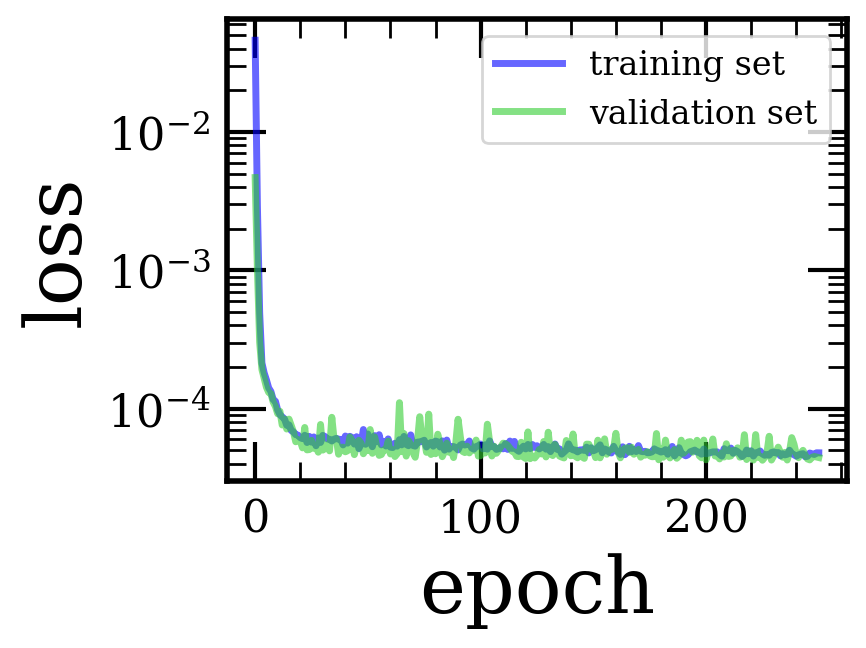

In [21]:
plotter.plot_loss(history_mean)

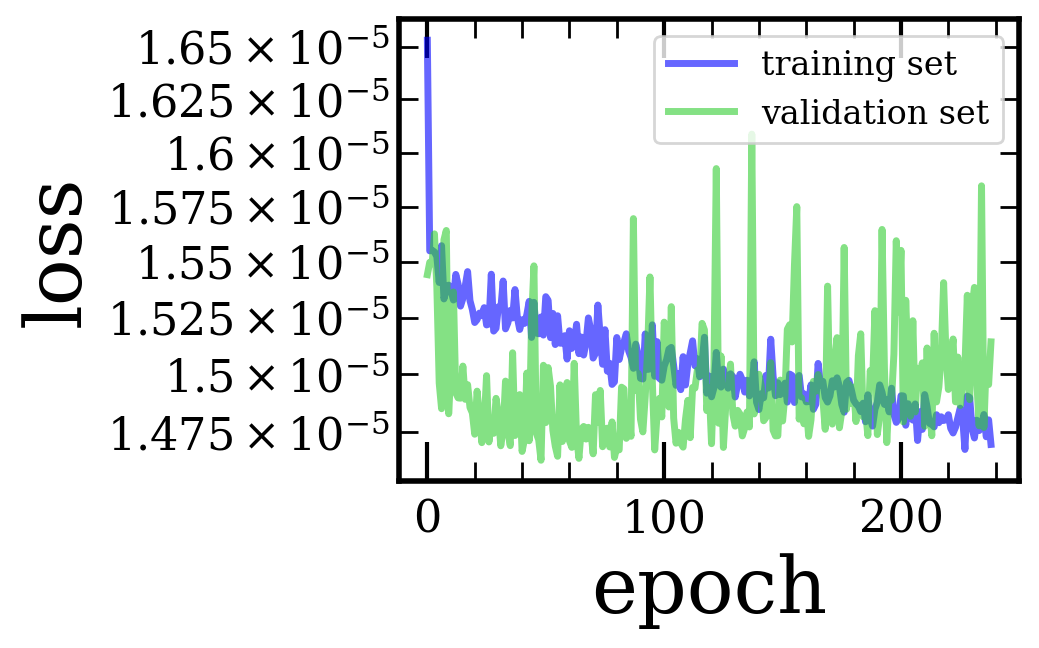

In [22]:
plotter.plot_loss(history_cov)

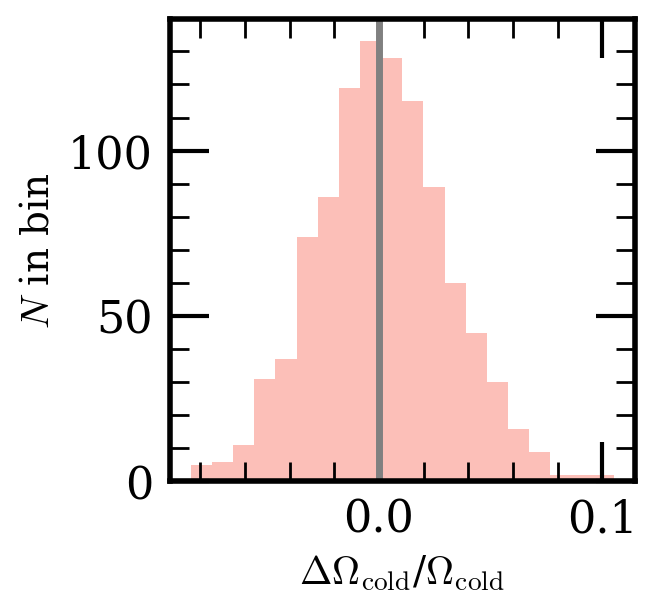

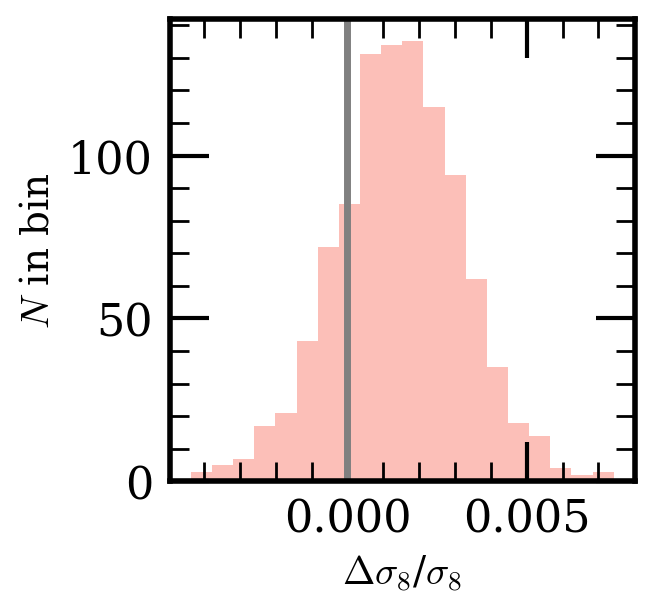

In [23]:

fracdiffs = (theta_test_pred - theta_test)/theta_test
plotter.plot_hists_mean(fracdiffs, param_labels)


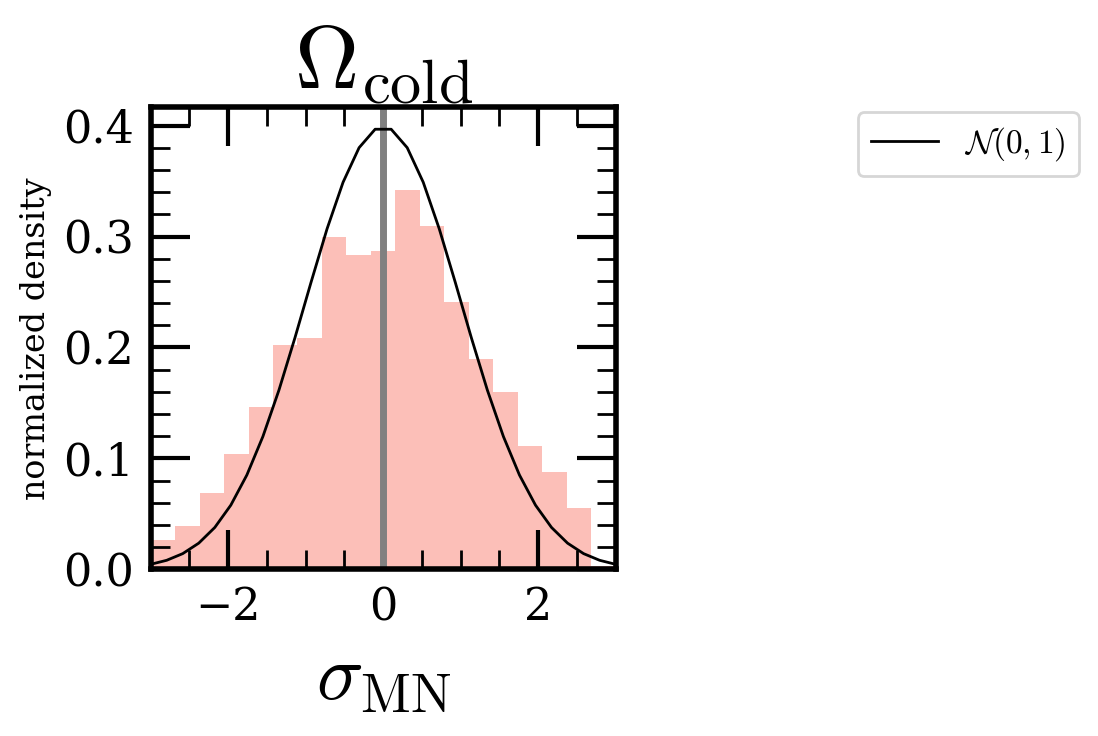

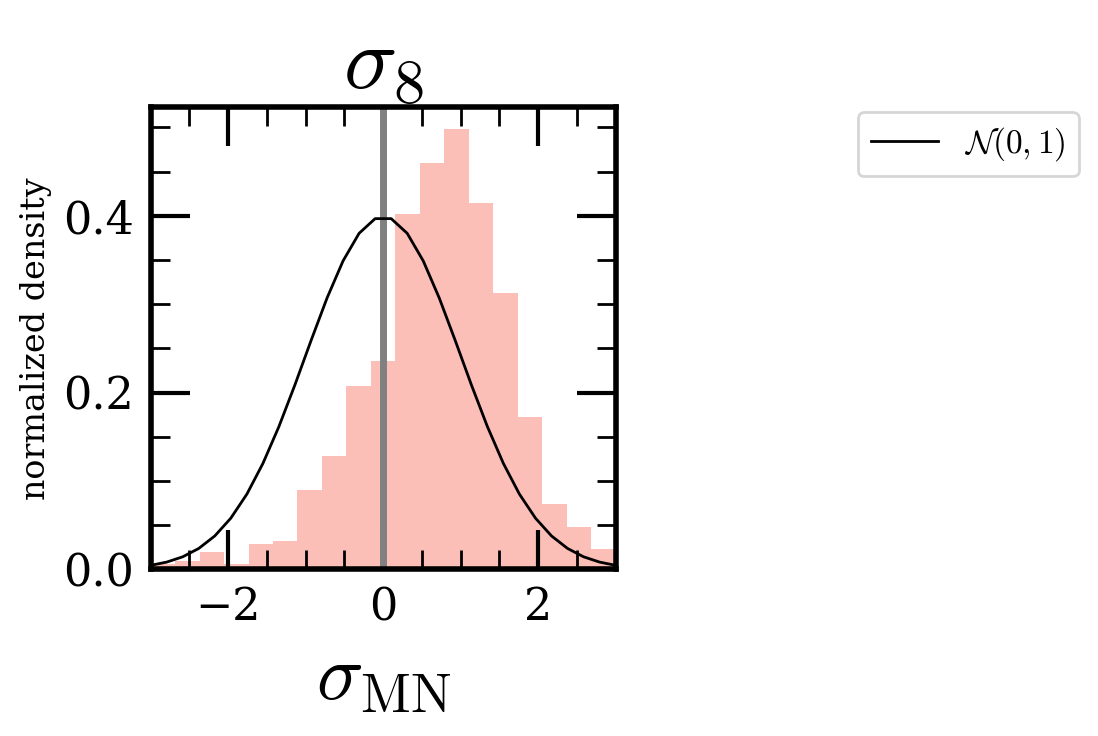

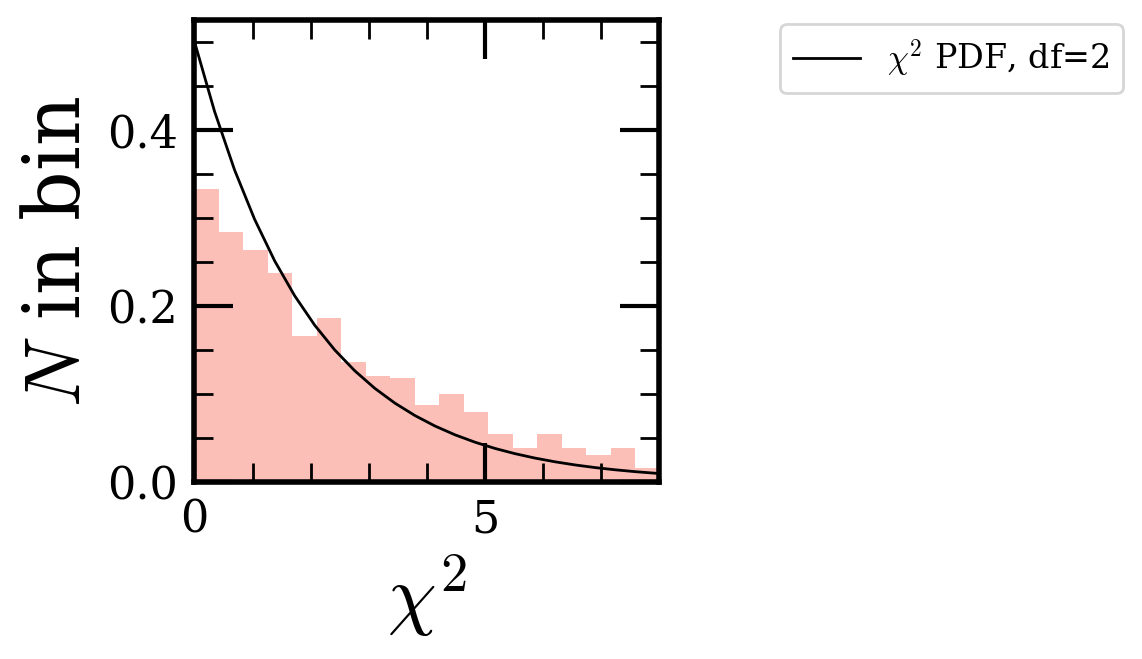

In [24]:
plotter.plot_hists_cov(theta_test, theta_test_pred, covs_test_pred, param_labels)

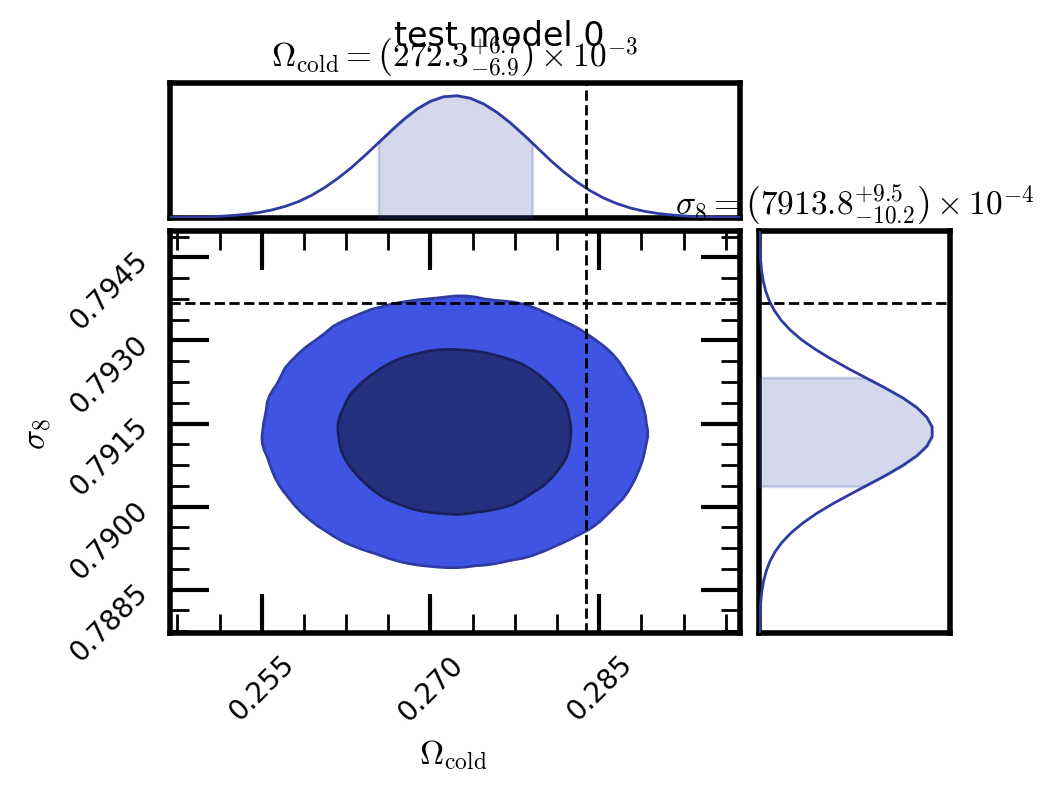

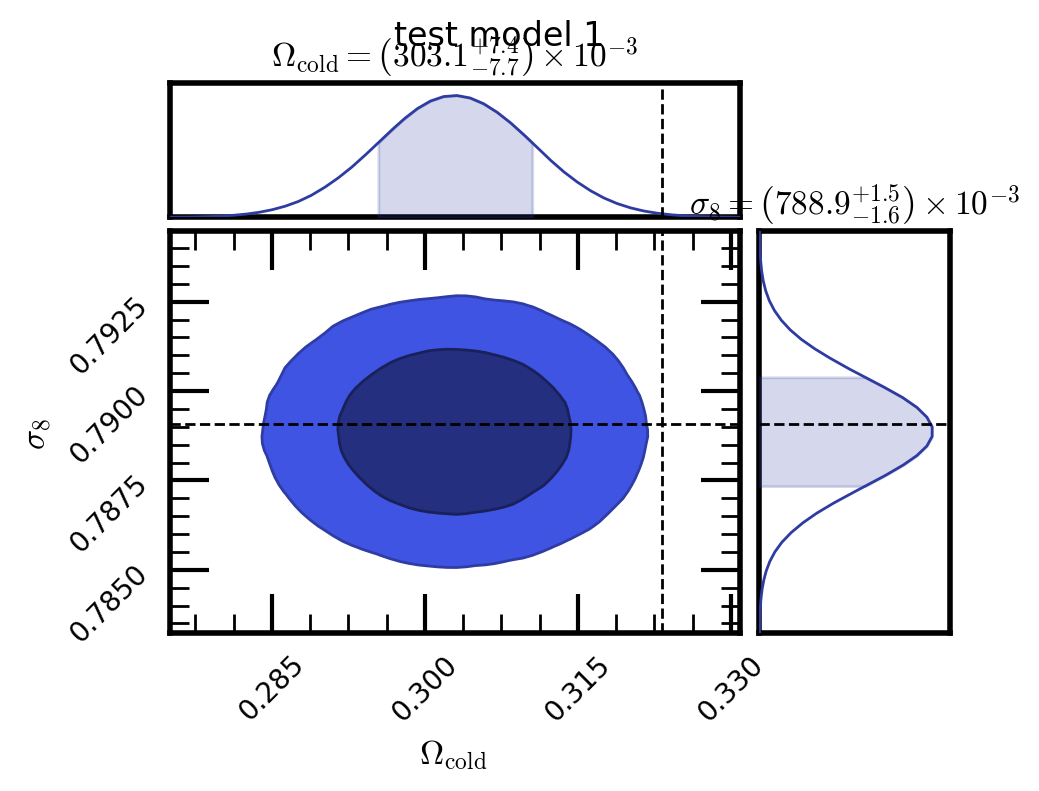

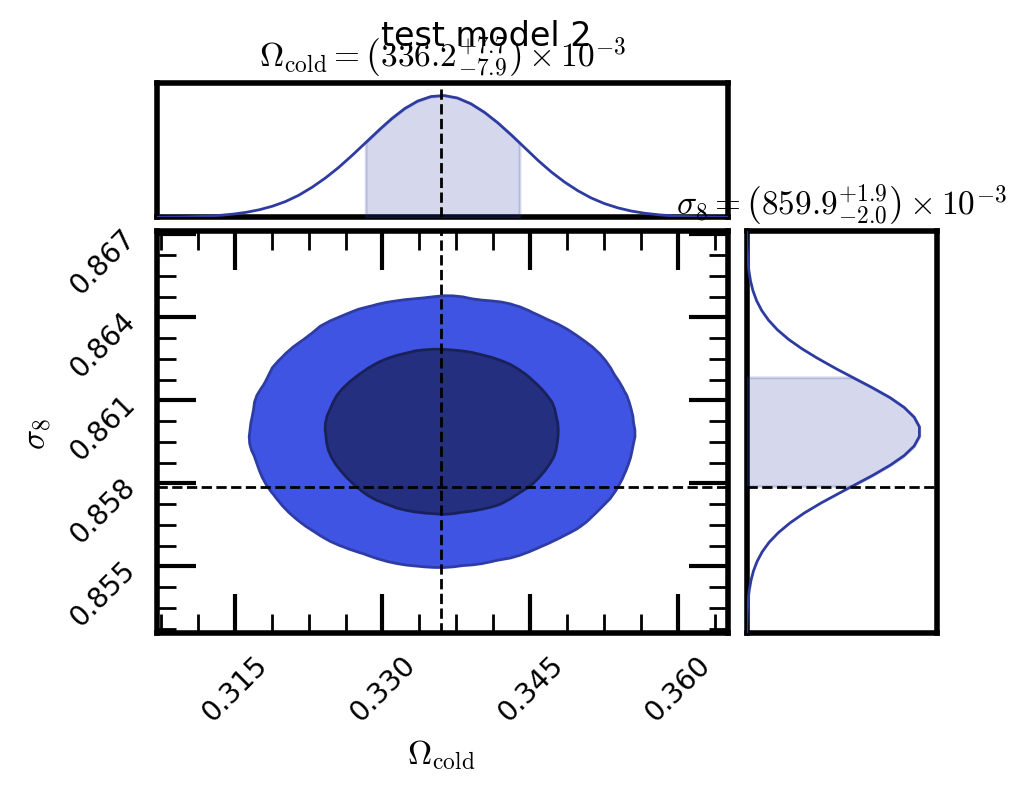

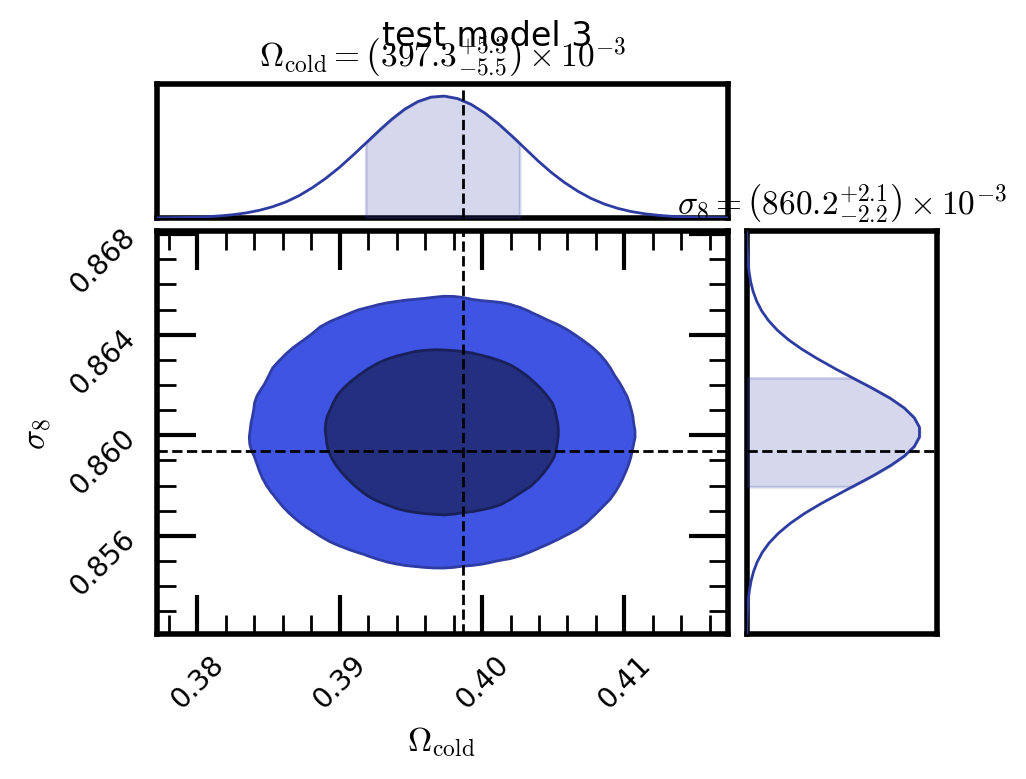

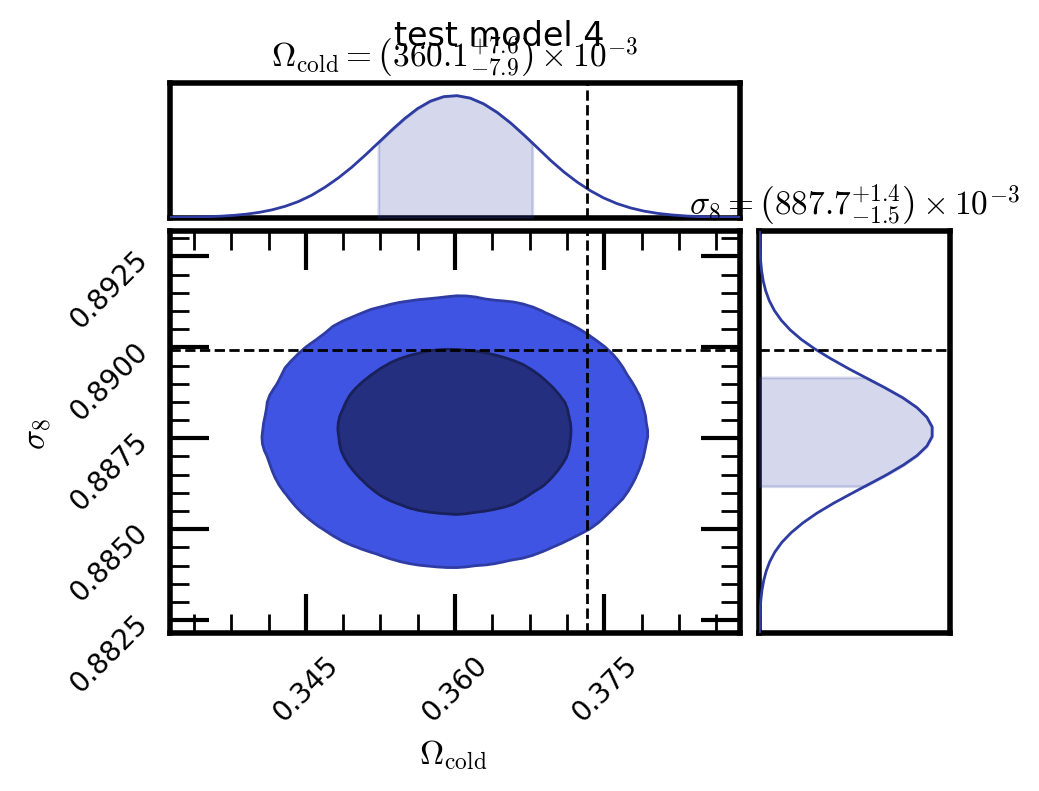

In [25]:
inf_methods = ['mn']
labels_extra = ['']
#colors = [utils.color_dict_methods[meth] for meth in methods]
colors = ['#2E3CA2']

for idx_obs in range(5):
    theta_obs_true = theta_test[idx_obs]
    plotter.plot_contours_inf(param_names, idx_obs, theta_obs_true, 
                            inf_methods, [tag_inf], 
                            colors=colors, labels_extra=labels_extra)



In [59]:
inf_methods = ['mn', 'mn']
#tags_inf = [tag_inf]*len(methods)
tags_inf = [
            f'{tag_data}_ntrain8000',
            f'{tag_data}_ntrain8000_diagcov_scalecovlog',
            ]

for tag_inf in tags_inf:
    dir_mn = f'../results/results_moment_network/mn{tag_inf}'

    theta_test_pred = np.load(f'{dir_mn}/theta_test_pred.npy')
    covs_test_pred = np.load(f'{dir_mn}/covs_test_pred.npy')
    print(theta_test_pred.shape, covs_test_pred.shape)
    
    moment_network = mn.MomentNetwork(theta_test=theta_test, #y_test=y_test_scaled, y_err_test=y_err_test_scaled,
                                      n_threads=None)
    covs_test_unrolled = moment_network.get_covariances(theta_test, theta_test_pred,
                                           include_covariances=True)
    #covs_test = [moment_network.rer]
    #print(covs_test[0])
    print(moment_network.unroll_covariance_matrix( np.linalg.cholesky(covs_test_pred[1]) ))
    print(covs_test_pred[1])
    print()
    

(1000, 5) (1000, 5, 5)
[[ 1.08056462e-04 -1.53892708e-05 -4.41257213e-04 -6.42048292e-05
  -2.09177657e-04]
 [-1.53892708e-05  2.19172135e-06  6.28433192e-05  9.14397420e-06
   2.97908292e-05]
 [-4.41257213e-04  6.28433192e-05  1.80190915e-03  2.62185559e-04
   8.54193707e-04]
 [-6.42048292e-05  9.14397420e-06  2.62185559e-04  3.81491306e-05
   1.24288871e-04]
 [-2.09177657e-04  2.97908292e-05  8.54193707e-04  1.24288871e-04
   4.04929899e-04]]
[0.010395021032346713, -0.0014804463362473646, 3.1941881530934804e-08, -0.04244890045177017, 1.8207430807892058e-08, 1.3169737656341188e-07, -0.006176498244069719, 2.649354503814228e-09, 1.8057635750194772e-08, 3.19367565275837e-08, -0.02012287004407013, 8.631377829157833e-09, 5.8831282499278253e-08, 2.03520730680235e-09, 3.475109480035095e-08]
[0.006596354745567003, 0.0012929774436895578, 6.554684033345195e-08, -0.012001635628177576, -1.2994952758275797e-06, 9.431106924765821e-08, 0.001245182609478812, -5.1136241594567435e-08, 7.687210609163076

In [26]:
inf_methods = ['emcee', 'mn']
#tags_inf = [tag_inf]*len(methods)
tags_inf = [f'{tag_data}',
            f'{tag_data}_ntrain8000',
            ]

labels_extra = ['', '']
#colors = [utils.color_dict_methods[meth] for meth in methods]
colors = ['#63E0CF', 'cyan', 'blue', '#2E3CA2', utils.color_dict_methods['emcee']]

for idx_obs in range(10):
    theta_obs_true = theta_test[idx_obs]
    plotter.plot_contours_inf(param_names, idx_obs, theta_obs_true, 
                            inf_methods, tags_inf, 
                            colors=colors, labels_extra=labels_extra)



ModuleNotFoundError: No module named 'emcee'

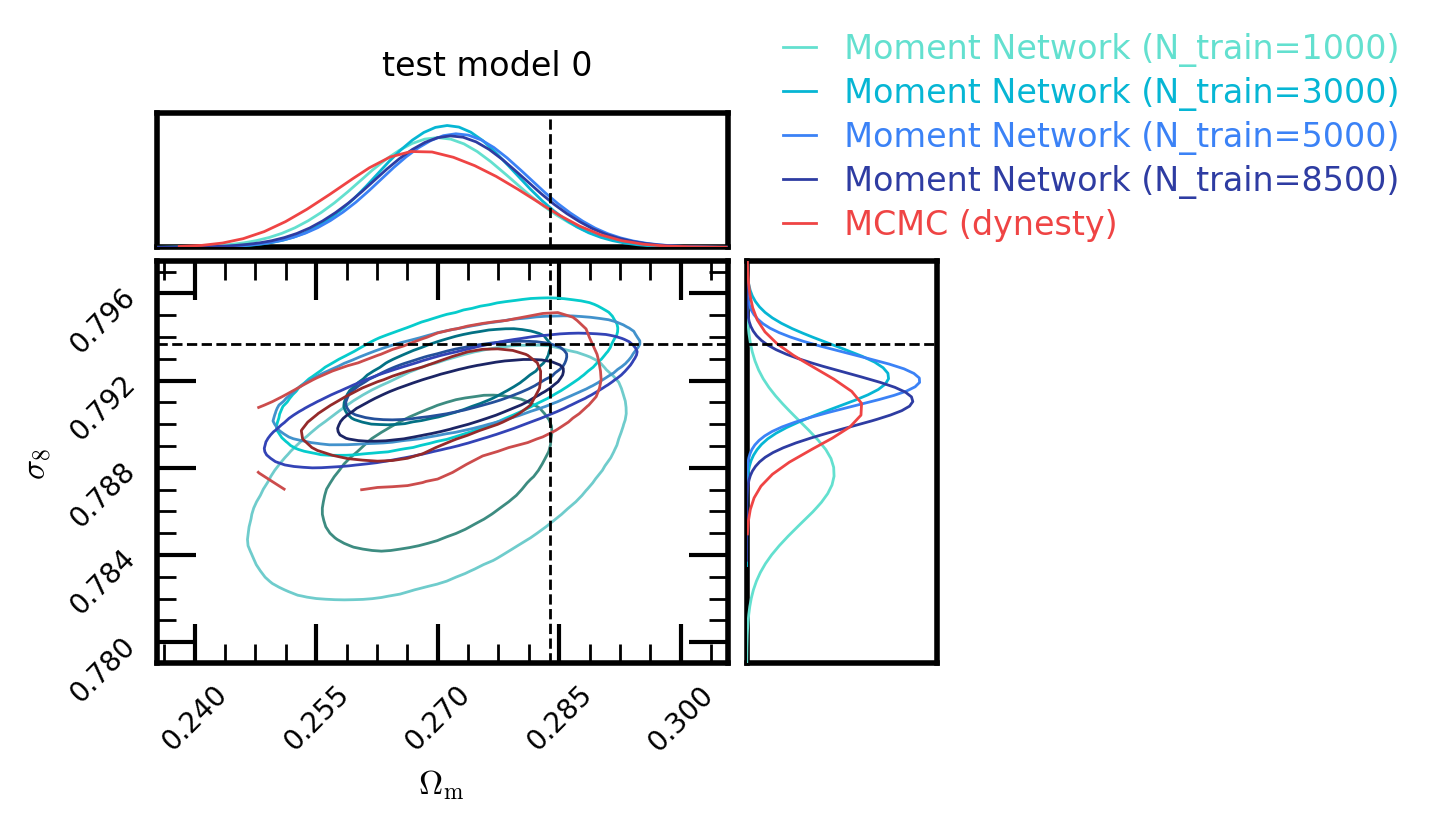

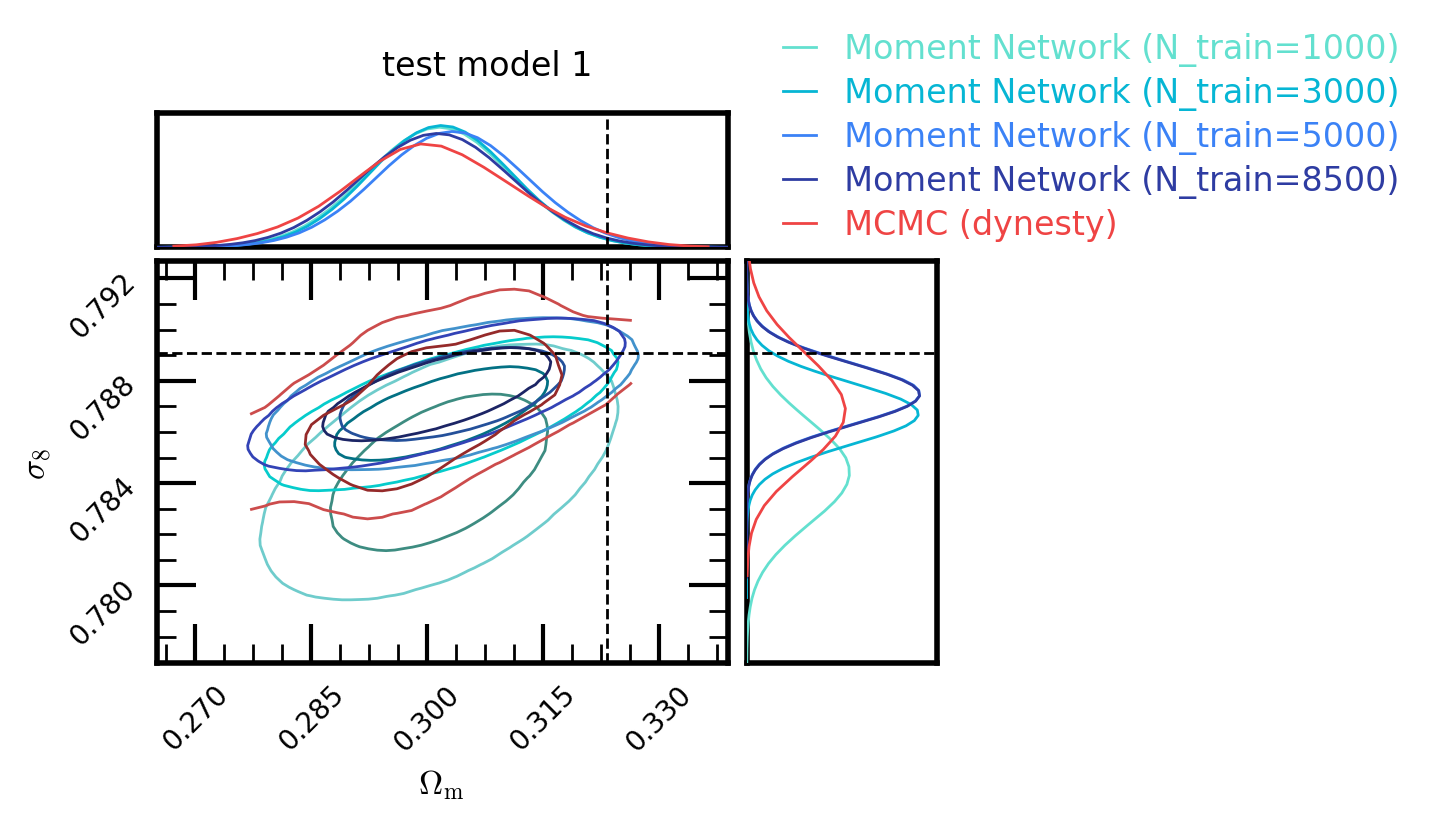

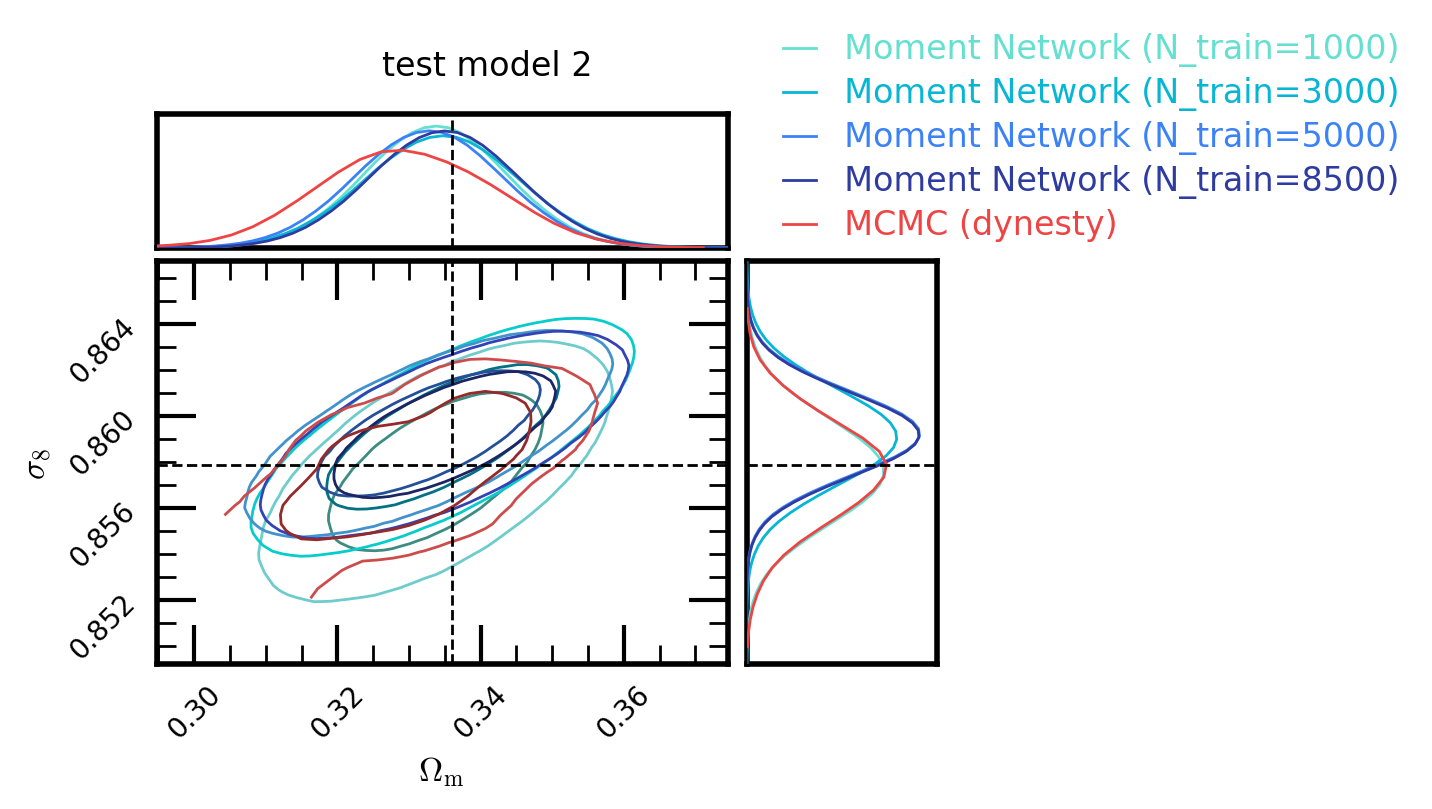

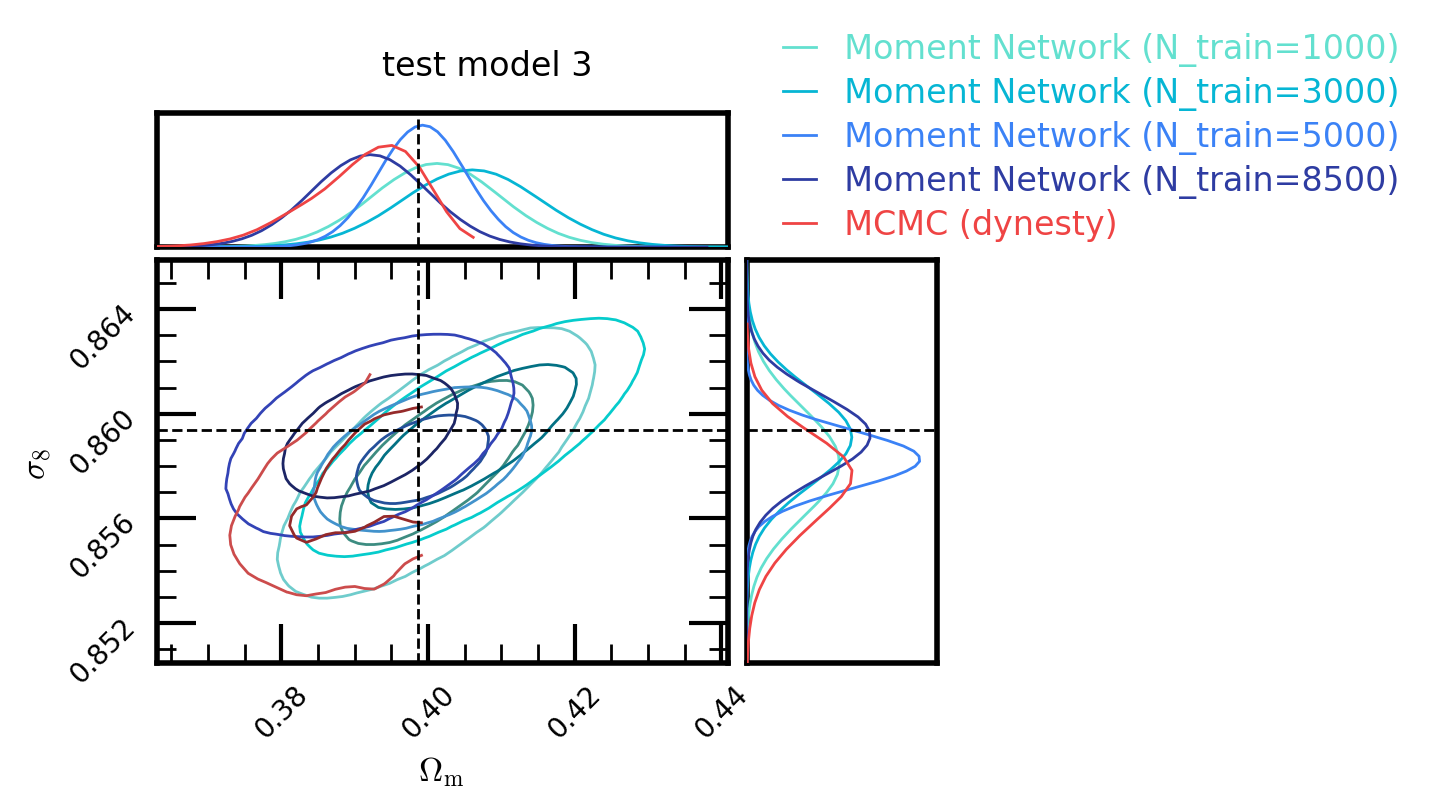

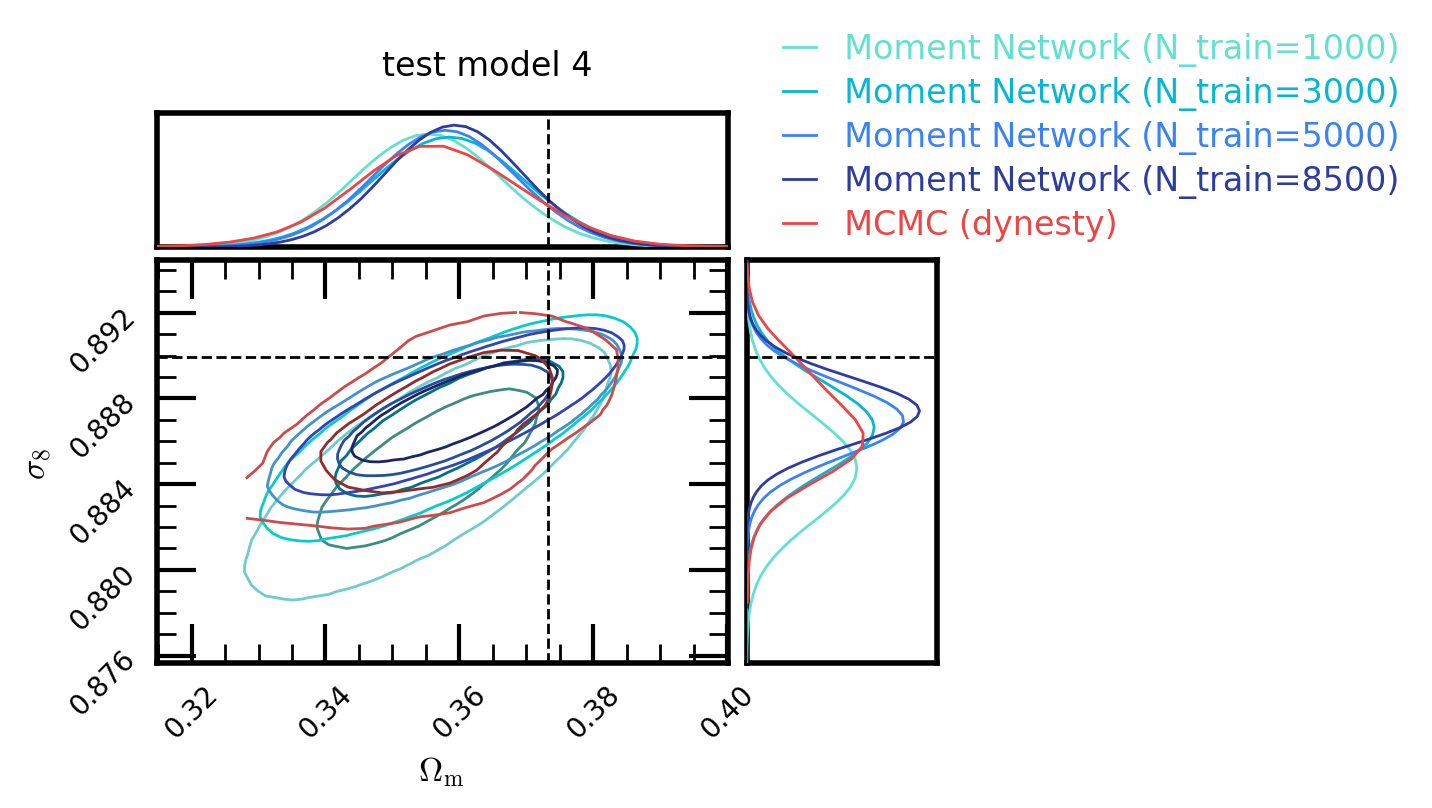

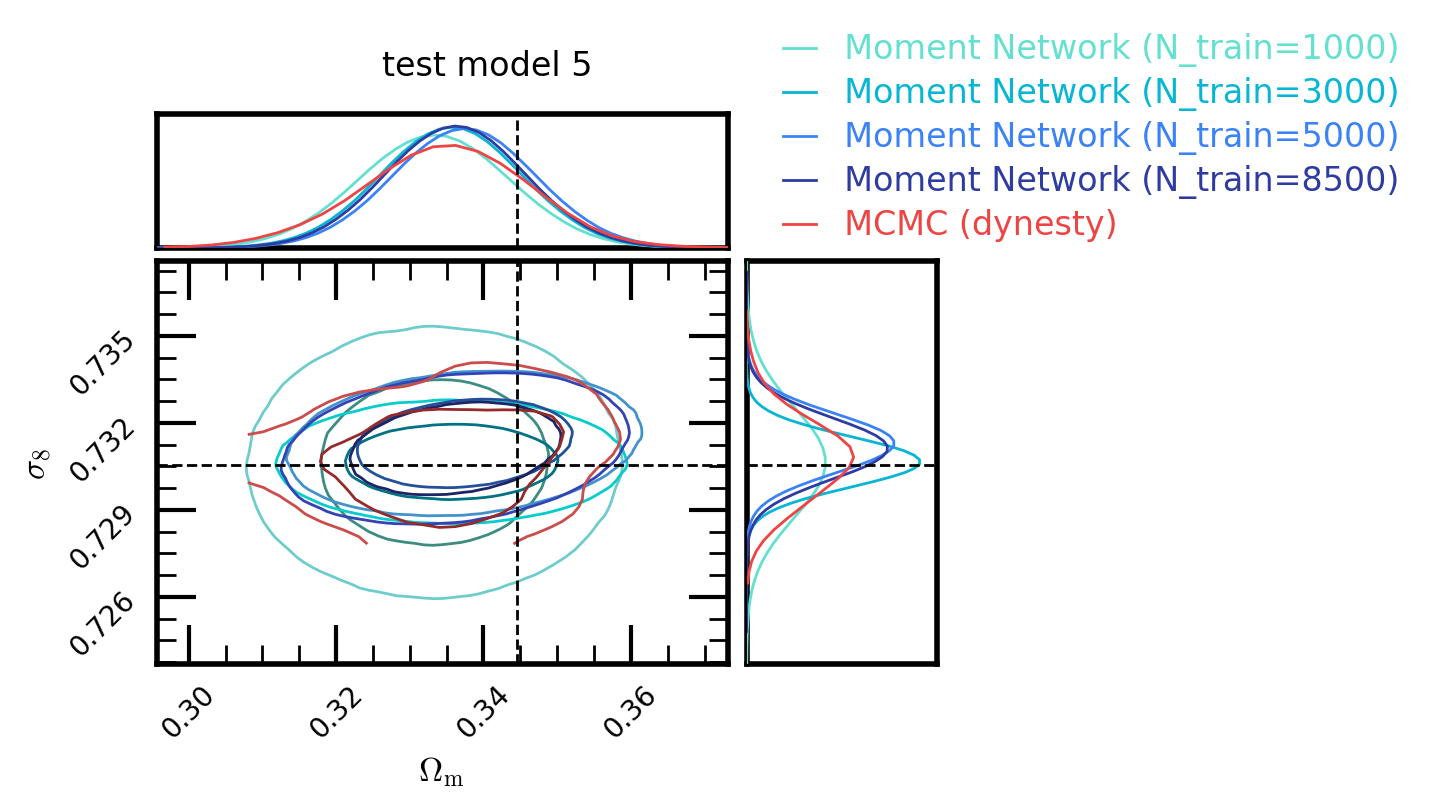

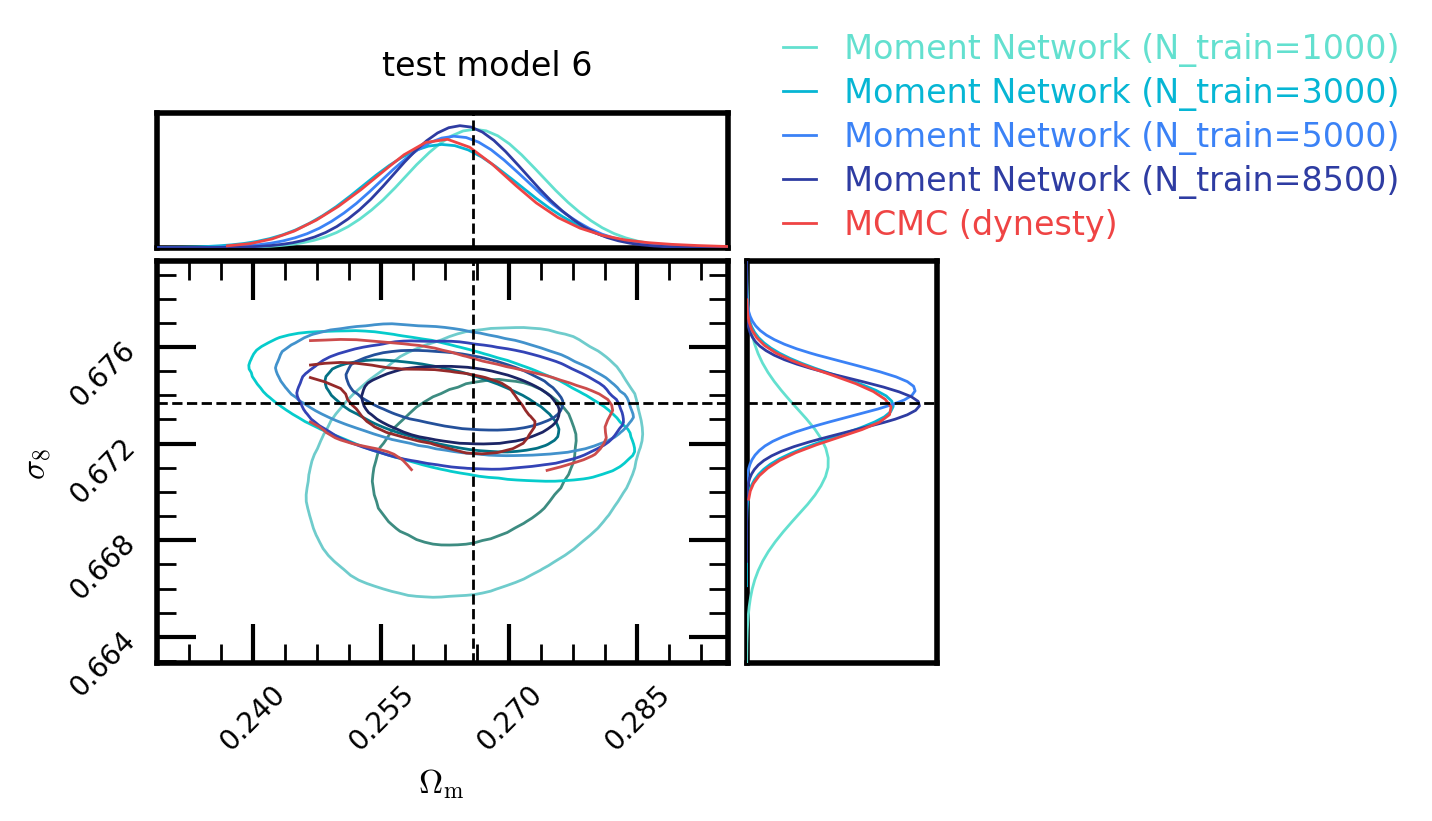

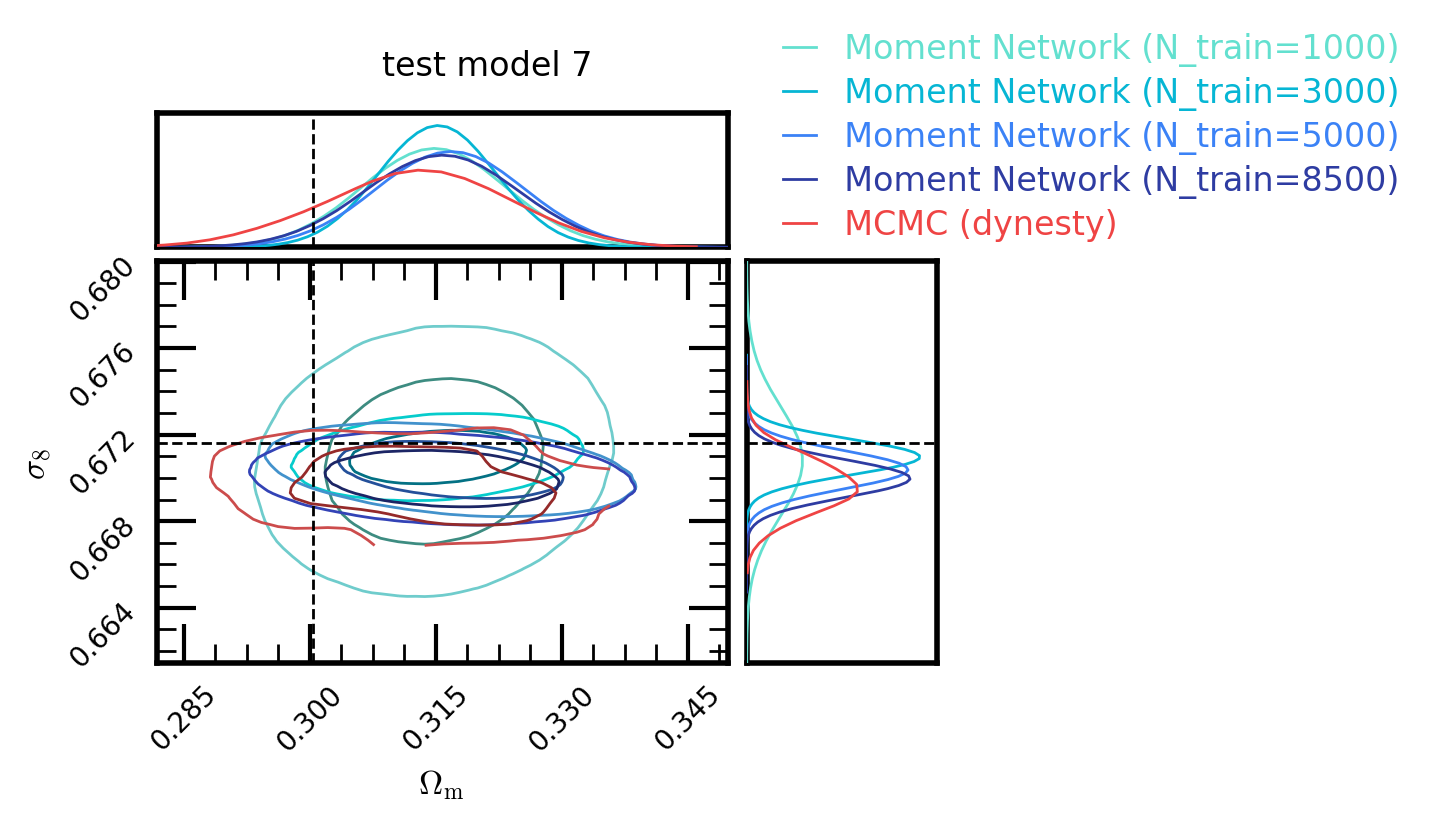

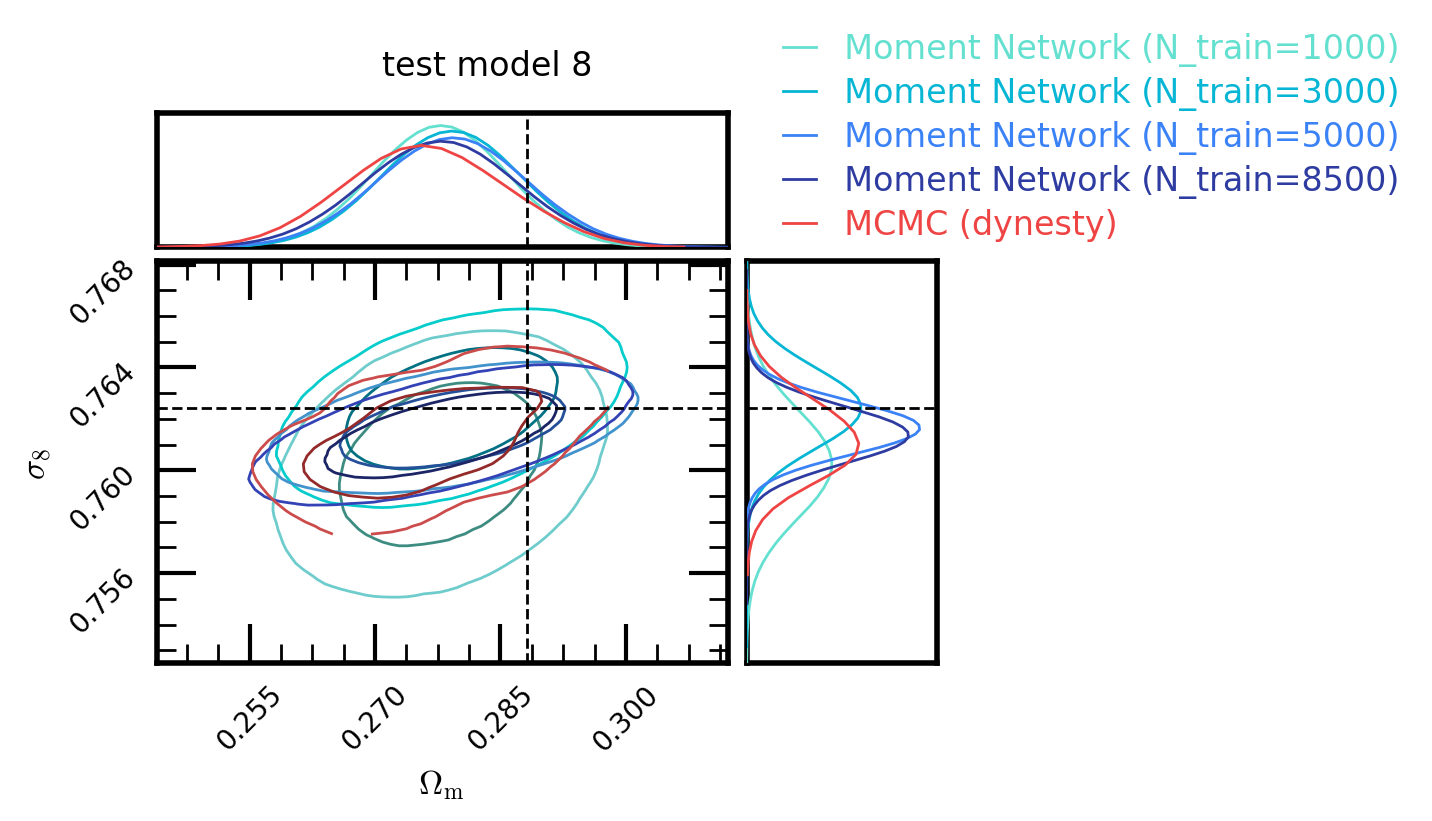

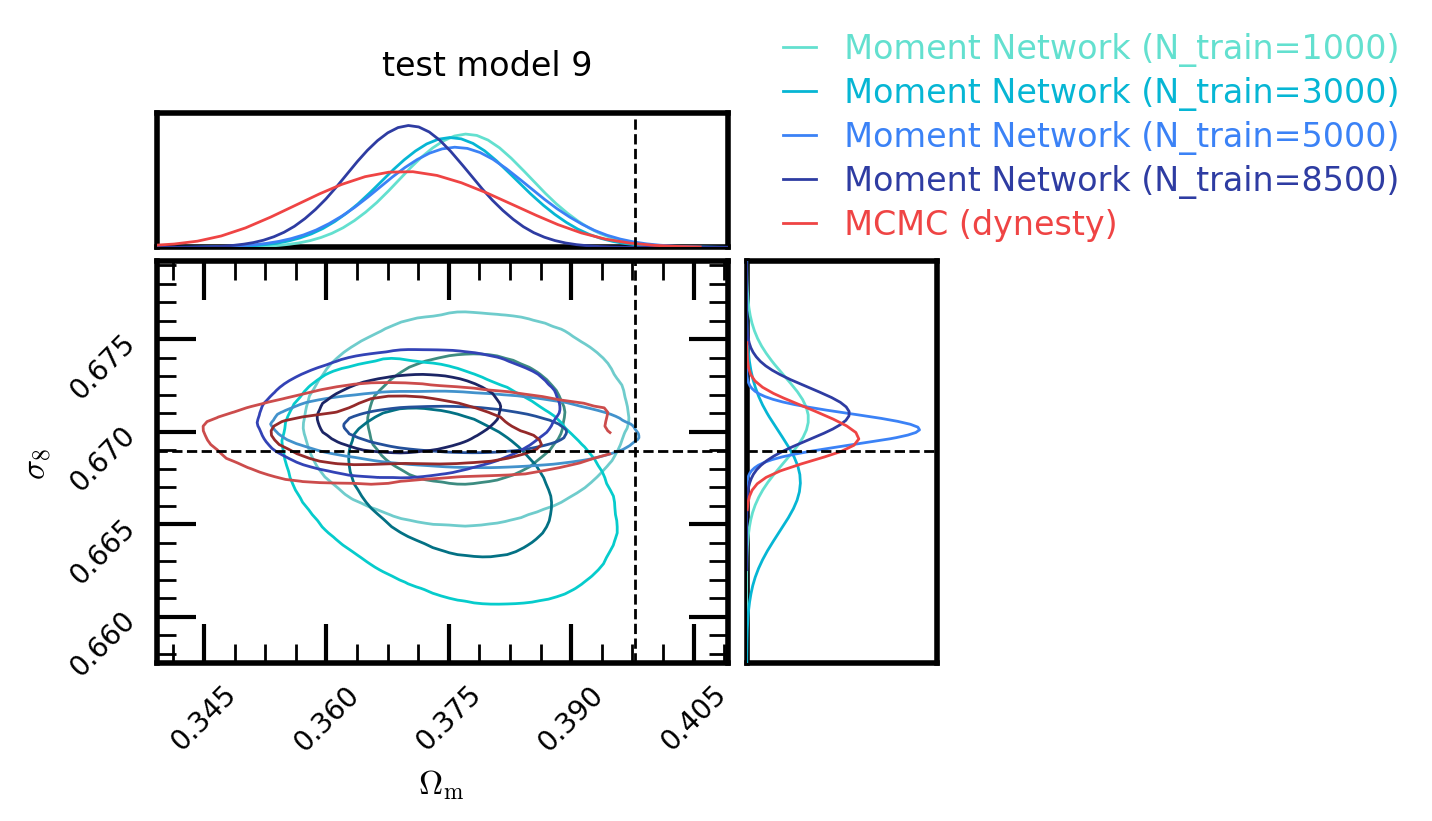

In [29]:
inf_methods = ['mn', 'mn', 'mn', 'mn', 'dynesty']
#tags_inf = [tag_inf]*len(methods)
tags_inf = ['_emuPk_2param_boxsize500_ntrain1000',
            '_emuPk_2param_boxsize500_ntrain3000',
            '_emuPk_2param_boxsize500_ntrain5000',
            '_emuPk_2param_boxsize500_ntrain8500',
            '_emuPk_2param_boxsize500']

labels_extra = ['(N_train=1000)', '(N_train=3000)', 
                '(N_train=5000)', '(N_train=8500)', '']
#colors = [utils.color_dict_methods[meth] for meth in methods]
colors = ['#63E0CF', 'cyan', 'blue', '#2E3CA2']

for idx_obs in range(10):
    theta_obs_true = theta_test[idx_obs]
    plotter.plot_contours_inf(param_names, idx_obs, theta_obs_true, 
                            inf_methods, tags_inf, 
                            colors=colors, labels_extra=labels_extra)



In [37]:
import re
tag_inf_dynesty = tag_data
dir_dynesty =  f'../data/results_dynesty/samplers{tag_inf_dynesty}'
print(dir_dynesty)
idxs_testsub = []
pattern = r'idxtest(\d+)'
for fn in os.listdir(dir_dynesty):
    if "_idxtest" in fn:
        match = re.search(pattern, fn)
        idxs_testsub.append(int(match.group(1)))
print(len(idxs_testsub))

../data/results_dynesty/samplers_emuPk_2param_boxsize500
69


(69, 2)
(69, 2)


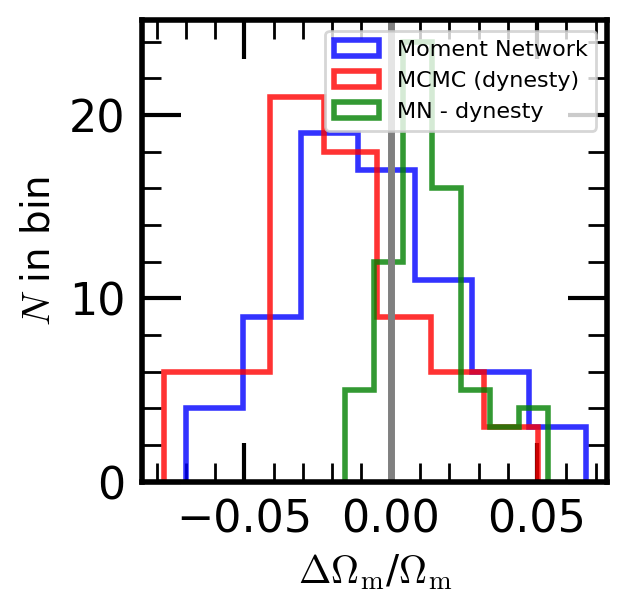

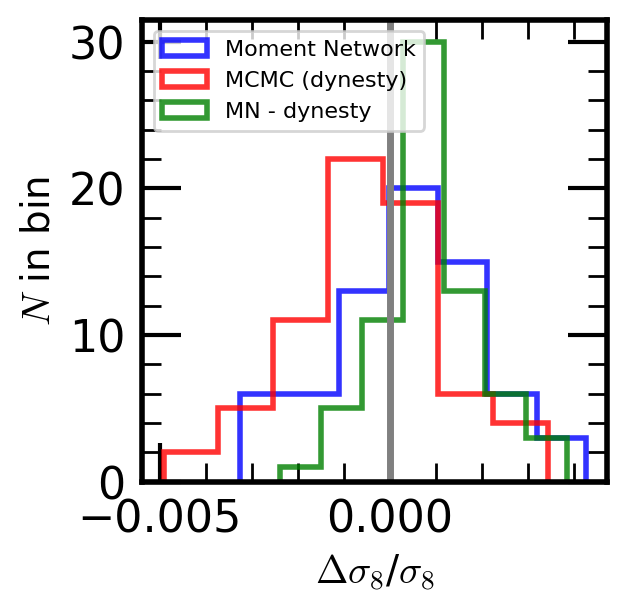

In [38]:

theta_testsub = theta_test[idxs_testsub]
theta_testsub_pred_mn = theta_test_pred[idxs_testsub]
theta_testsub_pred_dynesty = []
for idx_testsub in idxs_testsub:
    samples_dynesty = utils.get_samples_dynesty(idx_testsub, tag_inf_dynesty)
    theta_testsub_pred_dynesty.append( utils.get_posterior_maxes(samples_dynesty, param_names) )
    
theta_testsub_pred_dynesty = np.array(theta_testsub_pred_dynesty)
    

print(theta_testsub.shape)
print(theta_testsub_pred_dynesty.shape)
    
fracdiffs_mn = (theta_testsub_pred_mn - theta_testsub)/theta_testsub
#fracdiffs_emcee = (theta_testsub_pred_emcee - theta_testsub)/theta_testsub
fracdiffs_dynesty = (theta_testsub_pred_dynesty - theta_testsub)/theta_testsub
#fracdiffs_dynesty_emcee = (theta_testsub_pred_dynesty - theta_testsub_pred_emcee)/theta_testsub_pred_emcee
fracdiffs_mn_dynesty = (theta_testsub_pred_mn - theta_testsub_pred_dynesty)/theta_testsub_pred_dynesty

fracdiffs_arr = np.array([fracdiffs_mn, fracdiffs_dynesty, 
                          fracdiffs_mn_dynesty])
color_arr = [utils.color_dict_methods['mn'], 
             utils.color_dict_methods['dynesty'], 'green']
label_arr = [utils.label_dict_methods['mn'],
             utils.label_dict_methods['dynesty'], 'MN - dynesty']
plotter.plot_hists_mean(fracdiffs_arr, param_labels, 
                        color_arr=color_arr, label_arr=label_arr,
                        bins=7, alpha=0.8, histtype='step')


In [40]:
print("hi")

hi


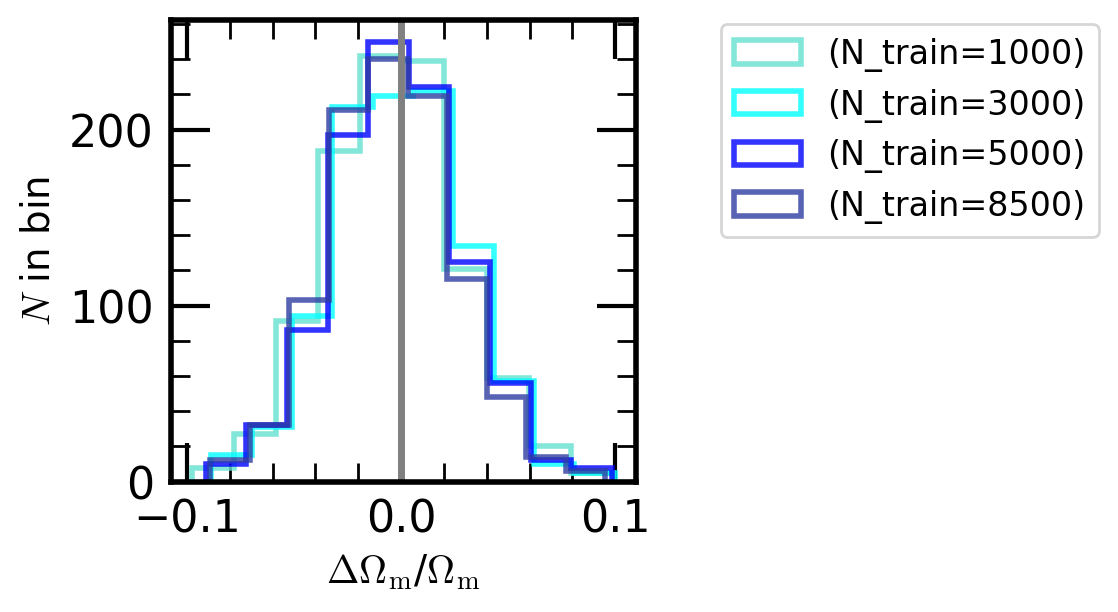

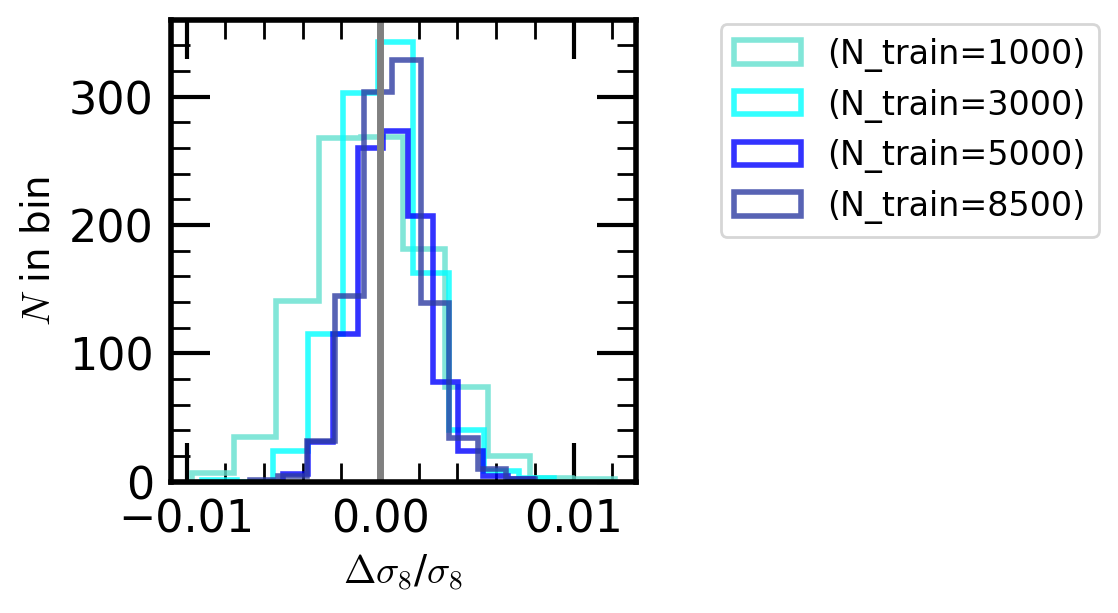

In [48]:
tags_inf = ['_emuPk_2param_boxsize500_ntrain1000',
            '_emuPk_2param_boxsize500_ntrain3000',
            '_emuPk_2param_boxsize500_ntrain5000',
            '_emuPk_2param_boxsize500_ntrain8500',
            ]

labels_extra = ['(N_train=1000)', '(N_train=3000)', 
                '(N_train=5000)', '(N_train=8500)', '']
#colors = [utils.color_dict_methods[meth] for meth in methods]
colors = ['#63E0CF', 'cyan', 'blue', '#2E3CA2']

fracdiffs_arr = []
for tag_inf in tags_inf:
    _theta_test_pred, _  = utils.get_moments_test_mn(tag_inf)
    fracdiffs_mn = (_theta_test_pred - theta_test)/theta_test
    fracdiffs_arr.append(fracdiffs_mn)
fracdiffs_arr = np.array(fracdiffs_arr)

plotter.plot_hists_mean(fracdiffs_arr, param_labels, 
                        color_arr=colors, label_arr=labels_extra,
                        bins=10, alpha=0.8, histtype='step')


### MCMC vs MN

In [14]:
idxs_obs = np.arange(100)
theta_obs = theta_test[idxs_obs]
theta_obs_pred_mn = theta_test_pred[idxs_obs]
covs_obs_pred_mn = covs_test_pred[idxs_obs]

covs_obs_pred_emcee = []
theta_obs_pred_emcee = []
for idx_obs in idxs_obs:
    samples_emcee = utils.get_samples_emcee(idx_obs, tag_data)
    theta_obs_pred_emcee.append( utils.get_posterior_maxes(samples_emcee, param_names) )
    covs_obs_pred_emcee.append( np.cov(samples_emcee.T) )
    
theta_obs_pred_emcee = np.array(theta_obs_pred_emcee)
covs_obs_pred_emcee = np.array(covs_obs_pred_emcee)

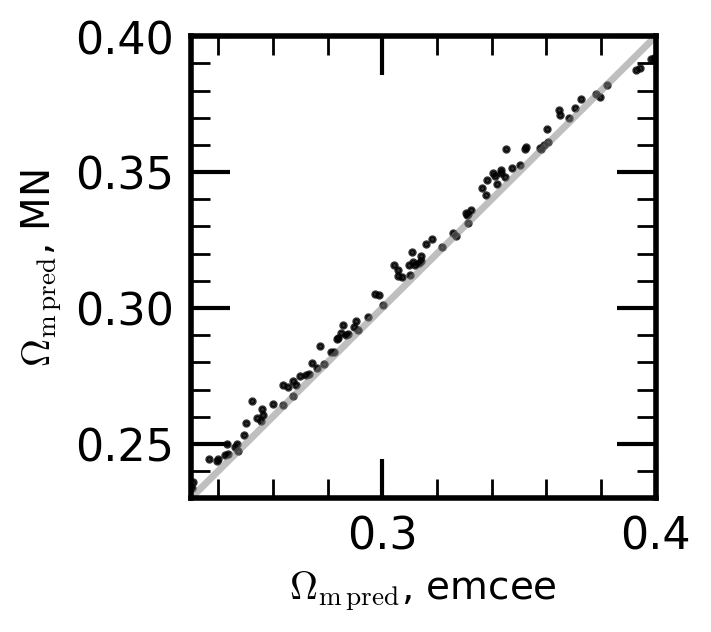

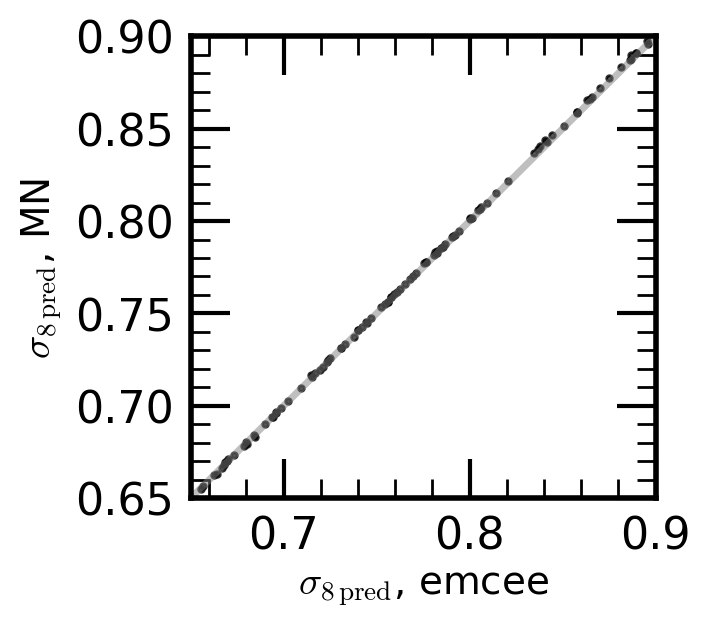

In [64]:
for pp, param_name in enumerate(param_names):
    plt.figure(figsize=(3,3))
    xx = np.linspace(*dict_bounds[param_name]) 
    plt.plot(xx, xx, color='grey', alpha=0.5)
    plt.scatter(theta_obs_pred_emcee[:,pp], theta_obs_pred_mn[:,pp],
                color='k', alpha=0.8, s=4)
    plt.xlabel(rf'{param_labels[pp]}$_\text{{pred}}$, emcee', fontsize=14)
    plt.ylabel(rf'{param_labels[pp]}$_\text{{pred}}$, MN', fontsize=14)
    plt.xlim(*dict_bounds[param_name])
    plt.ylim(*dict_bounds[param_name])


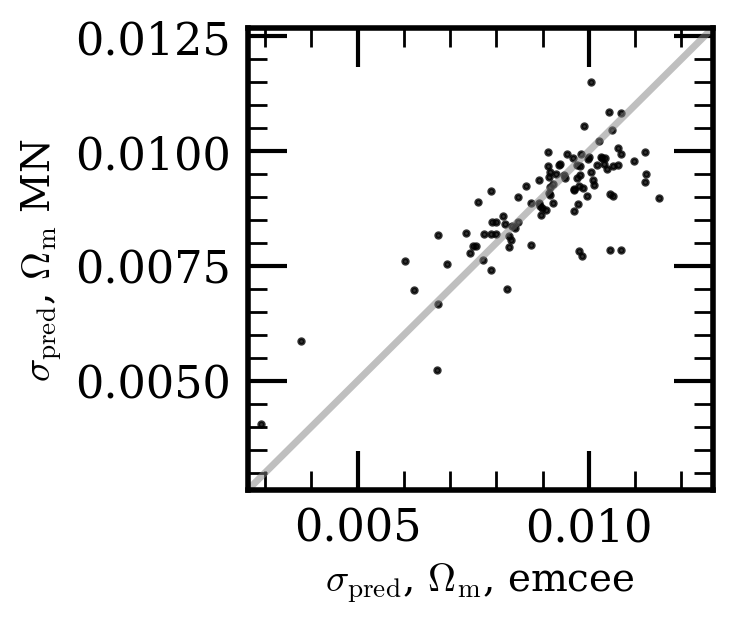

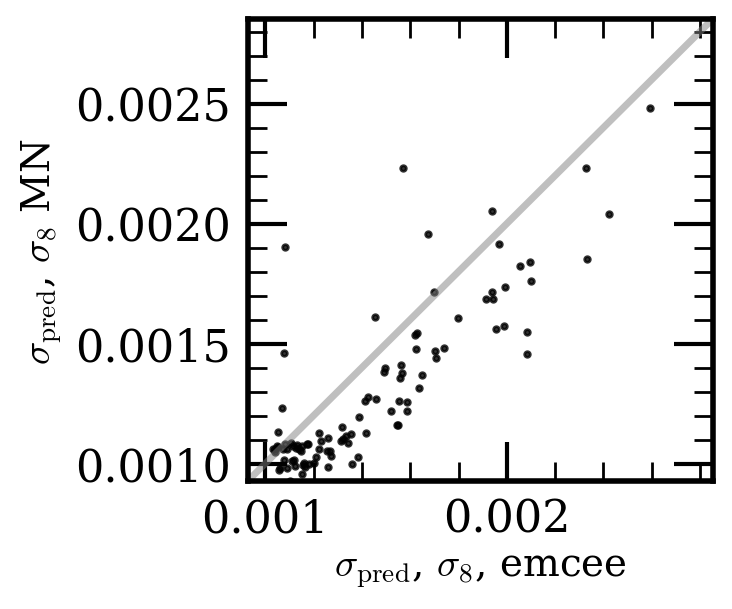

In [17]:
stds_emcee = np.array([np.sqrt(np.diag(cov)) for cov in covs_obs_pred_emcee])
stds_mn = np.array([np.sqrt(np.diag(cov)) for cov in covs_obs_pred_mn])
for pp, param_name in enumerate(param_names):
    plt.figure(figsize=(3,3))
    xmin, xmax = 0.9*np.min(stds_emcee[:,pp]), 1.1*np.max(stds_emcee[:,pp])
    xx = np.linspace(xmin, xmax) 
    plt.plot(xx, xx, color='grey', alpha=0.5)
    plt.scatter(stds_emcee[:,pp], stds_mn[:,pp],
                color='k', alpha=0.8, s=4)
    plt.xlabel(rf'$\sigma_\text{{pred}}$, {param_labels[pp]}, emcee', fontsize=14)
    plt.ylabel(rf'$\sigma_\text{{pred}}$, {param_labels[pp]} MN', fontsize=14)
    plt.xlim(xmin, xmax)
    plt.ylim(xmin, xmax)

In [69]:
covs_obs_pred_emcee.shape

(100, 2, 2)

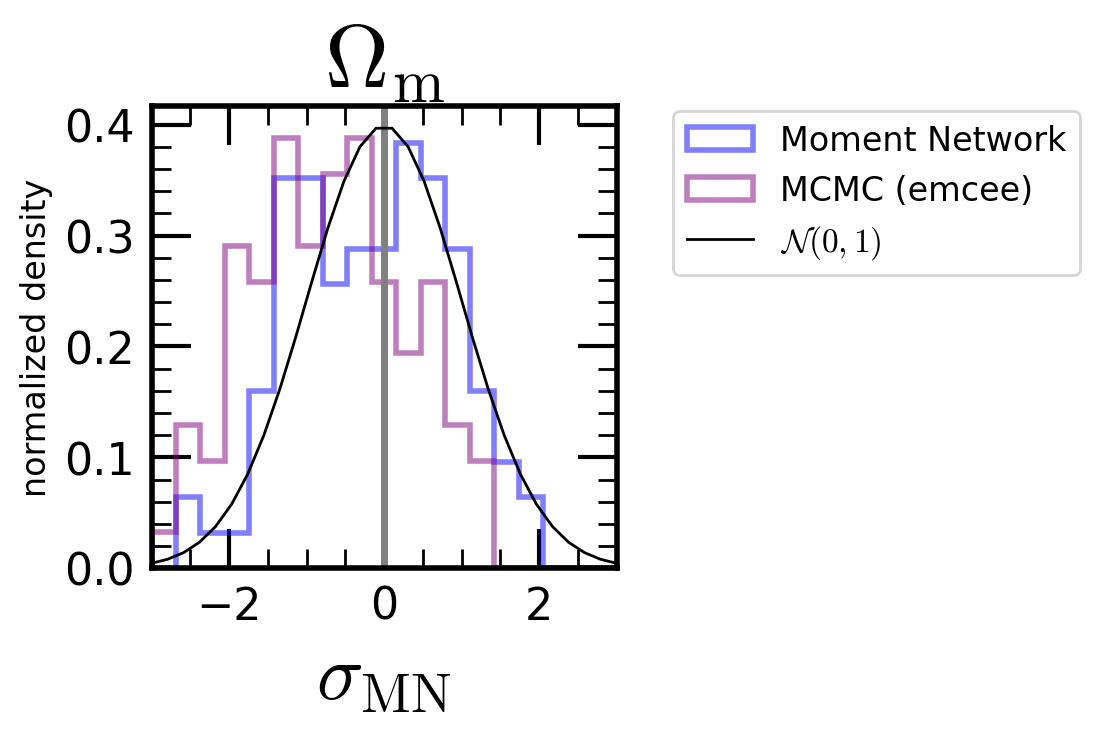

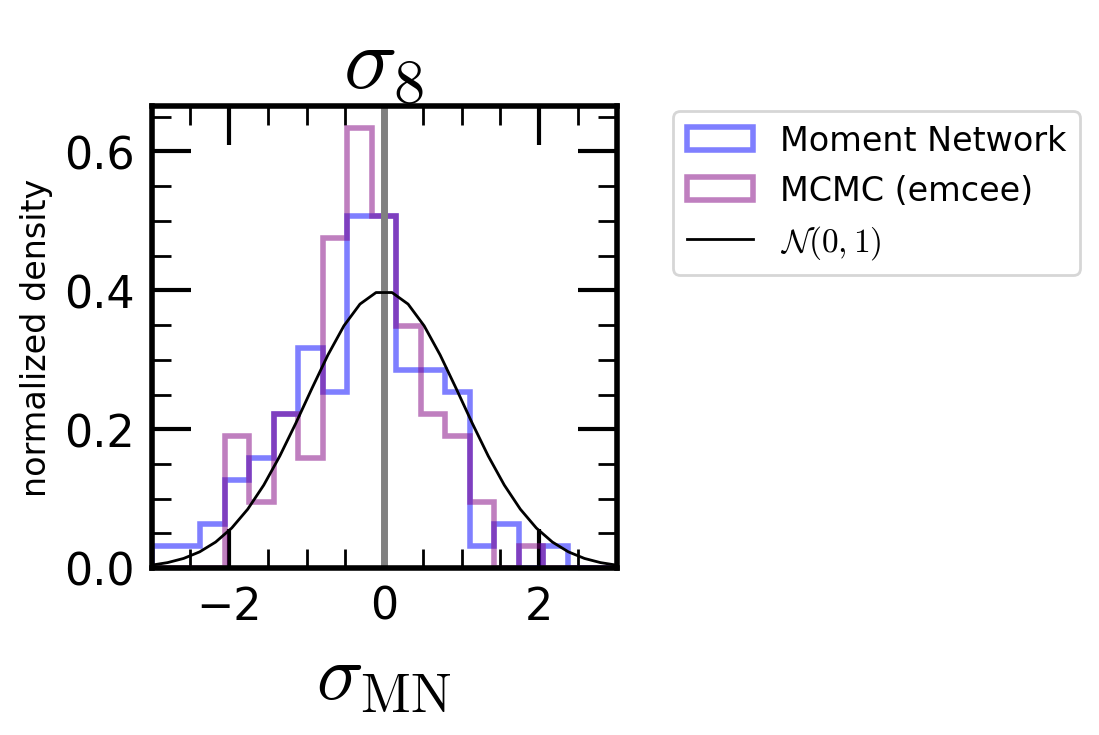

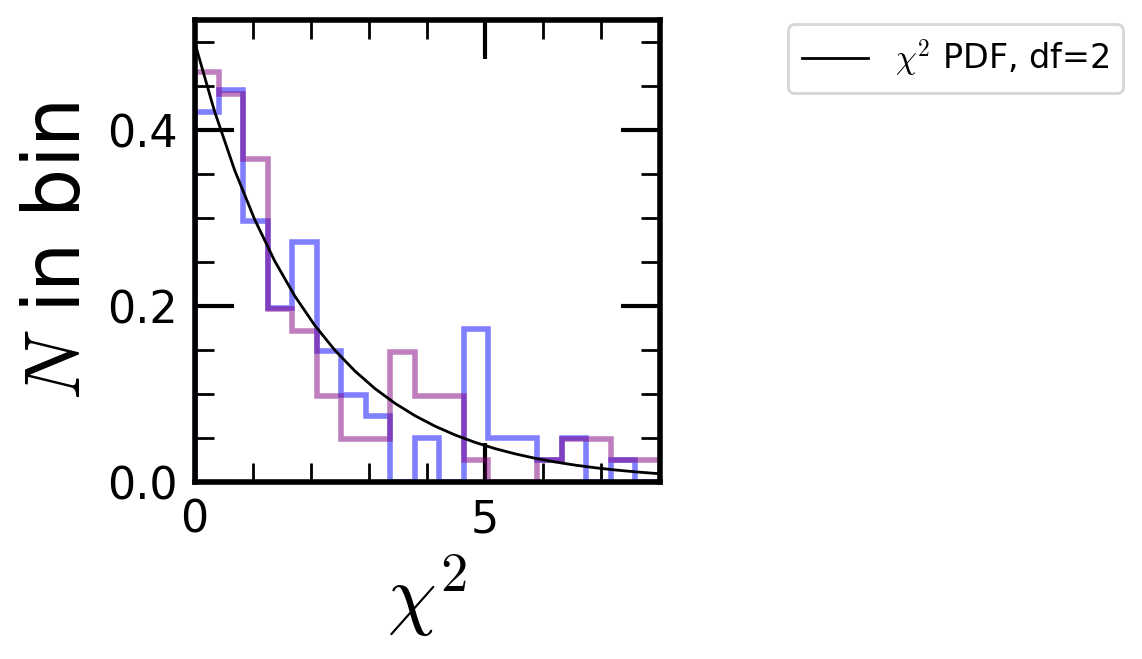

In [78]:
theta_obs_pred_arr = np.array([theta_obs_pred_mn, theta_obs_pred_emcee])
theta_obs_arr = np.array([theta_obs, theta_obs])
cov_obs_arr = np.array([covs_obs_pred_mn, covs_obs_pred_emcee])
color_arr = [utils.color_dict_methods['mn'], 
             utils.color_dict_methods['emcee']]
label_arr = [utils.label_dict_methods['mn'],
             utils.label_dict_methods['emcee']]
plotter.plot_hists_cov(theta_obs_arr, theta_obs_pred_arr, cov_obs_arr, param_labels,
                       color_arr=color_arr, label_arr=label_arr, histtype='step')
#plotter.plot_hists_cov(theta_obs, theta_obs_pred_emcee, covs_obs_pred_emcee, param_labels)

### Skewness

In [12]:
idx_obs = 2
tag_inf = tag_data
samples = utils.get_samples_emcee(idx_obs, tag_inf)

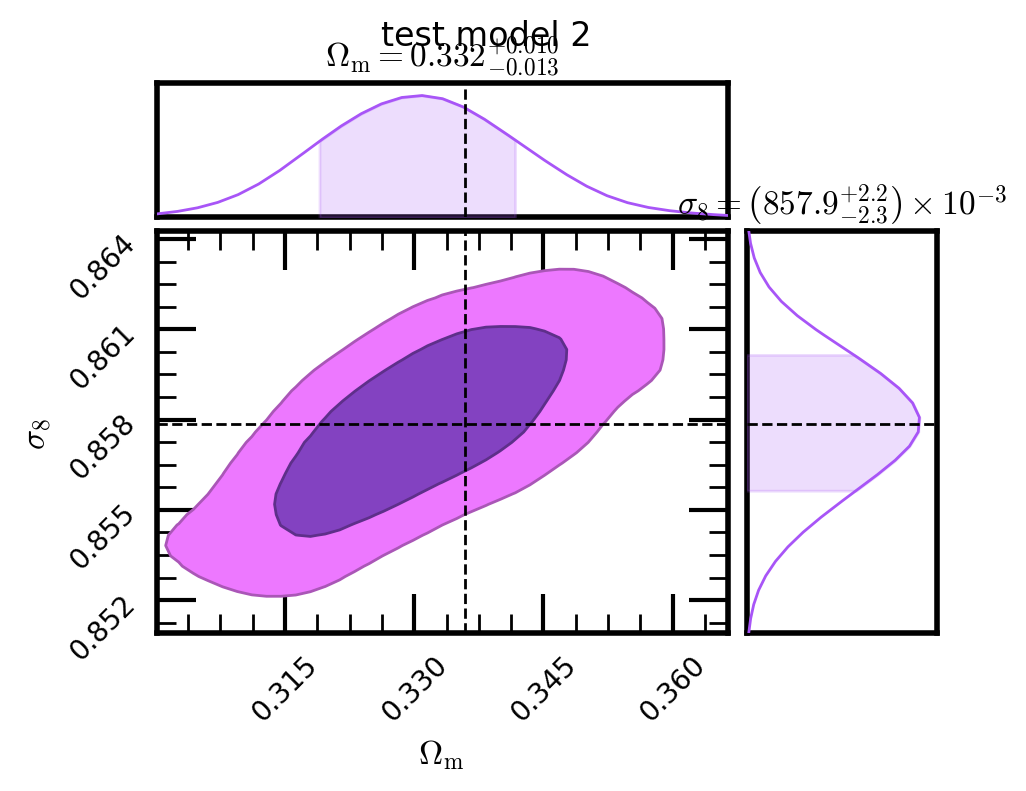

In [19]:
inf_methods = ['emcee']
tags_inf = [tag_inf]
theta_obs_true = theta_test[idx_obs]
plotter.plot_contours_inf(param_names, idx_obs, theta_obs_true, 
                        inf_methods, tags_inf 
                        #colors=colors, labels_extra=labels_extra
                        )



Cov about agrees w plot!

In [22]:
cov = np.cov(samples.T)
print(cov)
print(np.sqrt(np.diag(cov)))

[[1.14507328e-04 1.69978045e-05]
 [1.69978045e-05 4.41693479e-06]]
[0.01070081 0.00210165]


In [36]:
idxs_obs = np.arange(100)
tag_inf = tag_data
skews = []
skewtests = []
for idx_obs in idxs_obs:
    samples = utils.get_samples_emcee(idx_obs, tag_inf)
    skews.append( scipy.stats.skew(samples) ) 
    skewtests.append( scipy.stats.skewtest(samples) )
skews = np.array(skews)
pvals = np.array([s.pvalue for s in skewtests])


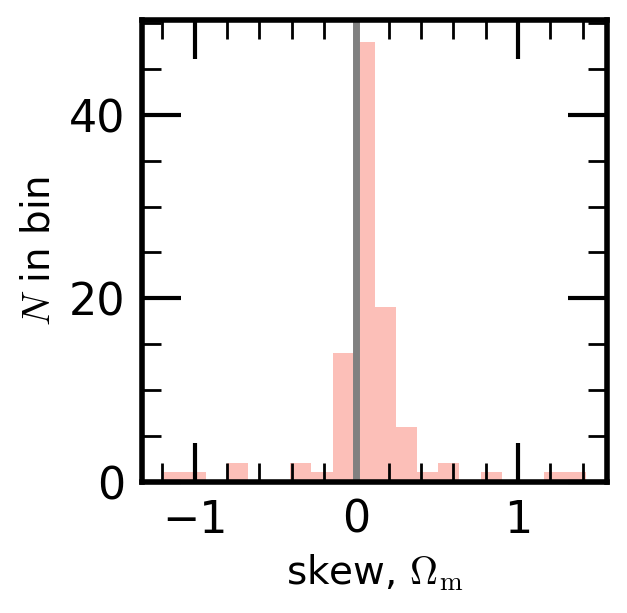

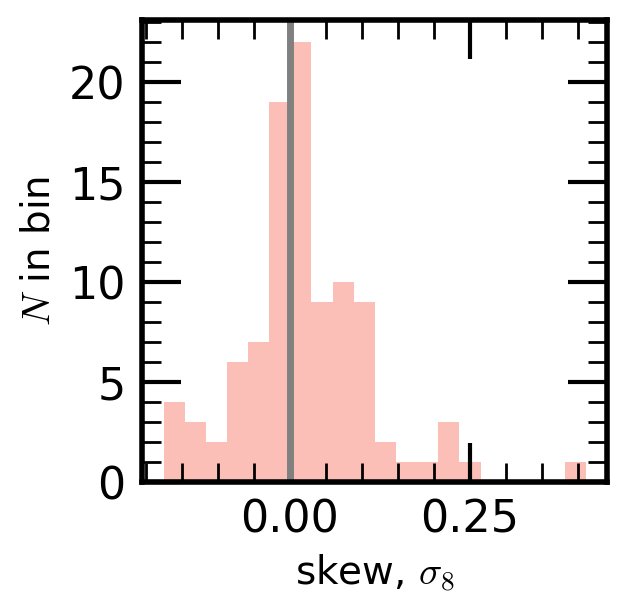

In [40]:
plotter.plot_hists_params(skews, param_labels, xlabel_base='skew')

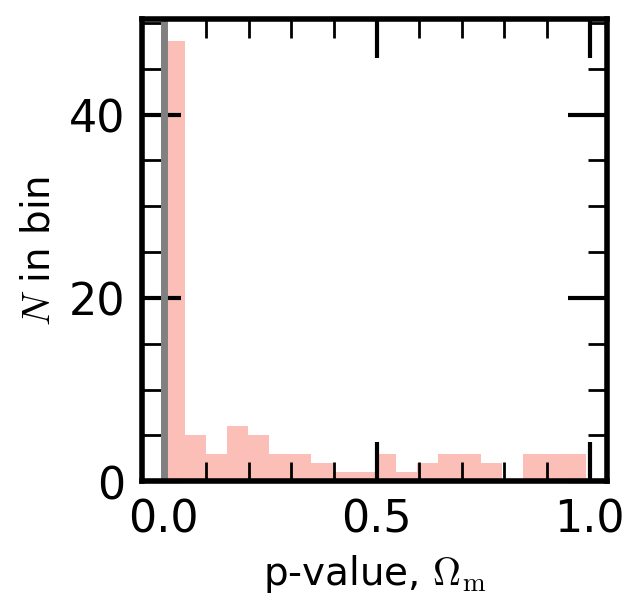

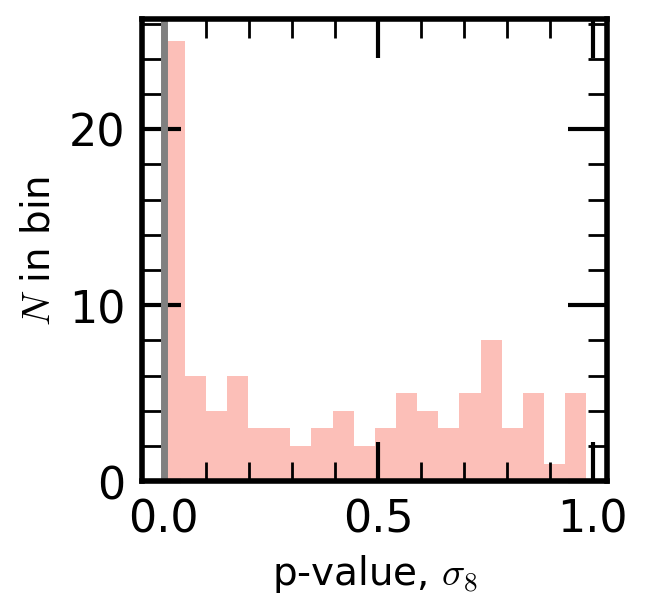

In [42]:
plotter.plot_hists_params(pvals, param_labels, xlabel_base='p-value')